In [18]:
import fbm
import matplotlib.pyplot as plt
from fbm.sim.davies_harte import DaviesHarteFBmGenerator
from angiofsde import *
import time
from warmup_eigenvalues import *

# Paths

In [19]:

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)

figures = {

}
list_H = [0.5, 0.675, 0.85]

time_start = time.time()
warmup_eigenvalues(list_H, n_steps)
for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=exponential_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"exp0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray
    
time_stop = time.time()
print(f"Simulation time: {time_stop - time_start:.5f} seconds")

Calculo la matriz de covarianza y sus eigenvalores para H=0.500 y N=8192
Calculo la matriz de covarianza y sus eigenvalores para H=0.675 y N=8192
Calculo la matriz de covarianza y sus eigenvalores para H=0.850 y N=8192


Simulation time: 4.66933 seconds


In [20]:

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)

# for h in list_H:
# TODO: Recoletar basura
# TODO: Recoletar basura
time_start = time.time()
list_H = [0.5, 0.675, 0.85]
warmup_eigenvalues(list_H, n_steps)
for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=linear_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"lin0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray
time_stop = time.time()
print(f"Simulation time: {time_stop - time_start:.5f} seconds")

Simulation time: 0.26651 seconds


In [14]:

n_reps = 5
# Hurst_index = 0.5
n_steps = 5_000
dtau = .1
delta = 1  # Done: review the delta effect over the simulation
mode = 'Simulate'
wall = 50
linear_gradient = LinearGradient(0.1, [0, wall], wall)
constant_gradient = ConstantGradient(0.1)
exponential_gradient = ExponentialGradient(0.1, [0, wall], wall)

# for h in list_H:
# TODO: Recoletar basura
# TODO: Recoletar basura

list_H = [0.5, 0.675, 0.85]

for h in list_H:
    A_sim = AngioSimulation(n_reps, h, n_steps, dtau, delta,
                        xa=[0, wall],
                        mode="Simulate",
                        wall=wall, 
                        # only_ht=True, 
                        Grad=constant_gradient)
    A_sim.simulate(n_jobs=10)
    # if figures['exp'] is None:
    h = str(h).split(".")[1]
    key = f"con0{h}"
    tray = A_sim.get_trajectories()
    figures[key] = tray

In [15]:
figures.keys()

dict_keys(['exp05', 'exp0675', 'exp085', 'lin05', 'lin0675', 'lin085', 'con05', 'con0675', 'con085'])

Text(0.5, 0, 'X [a.u.]')

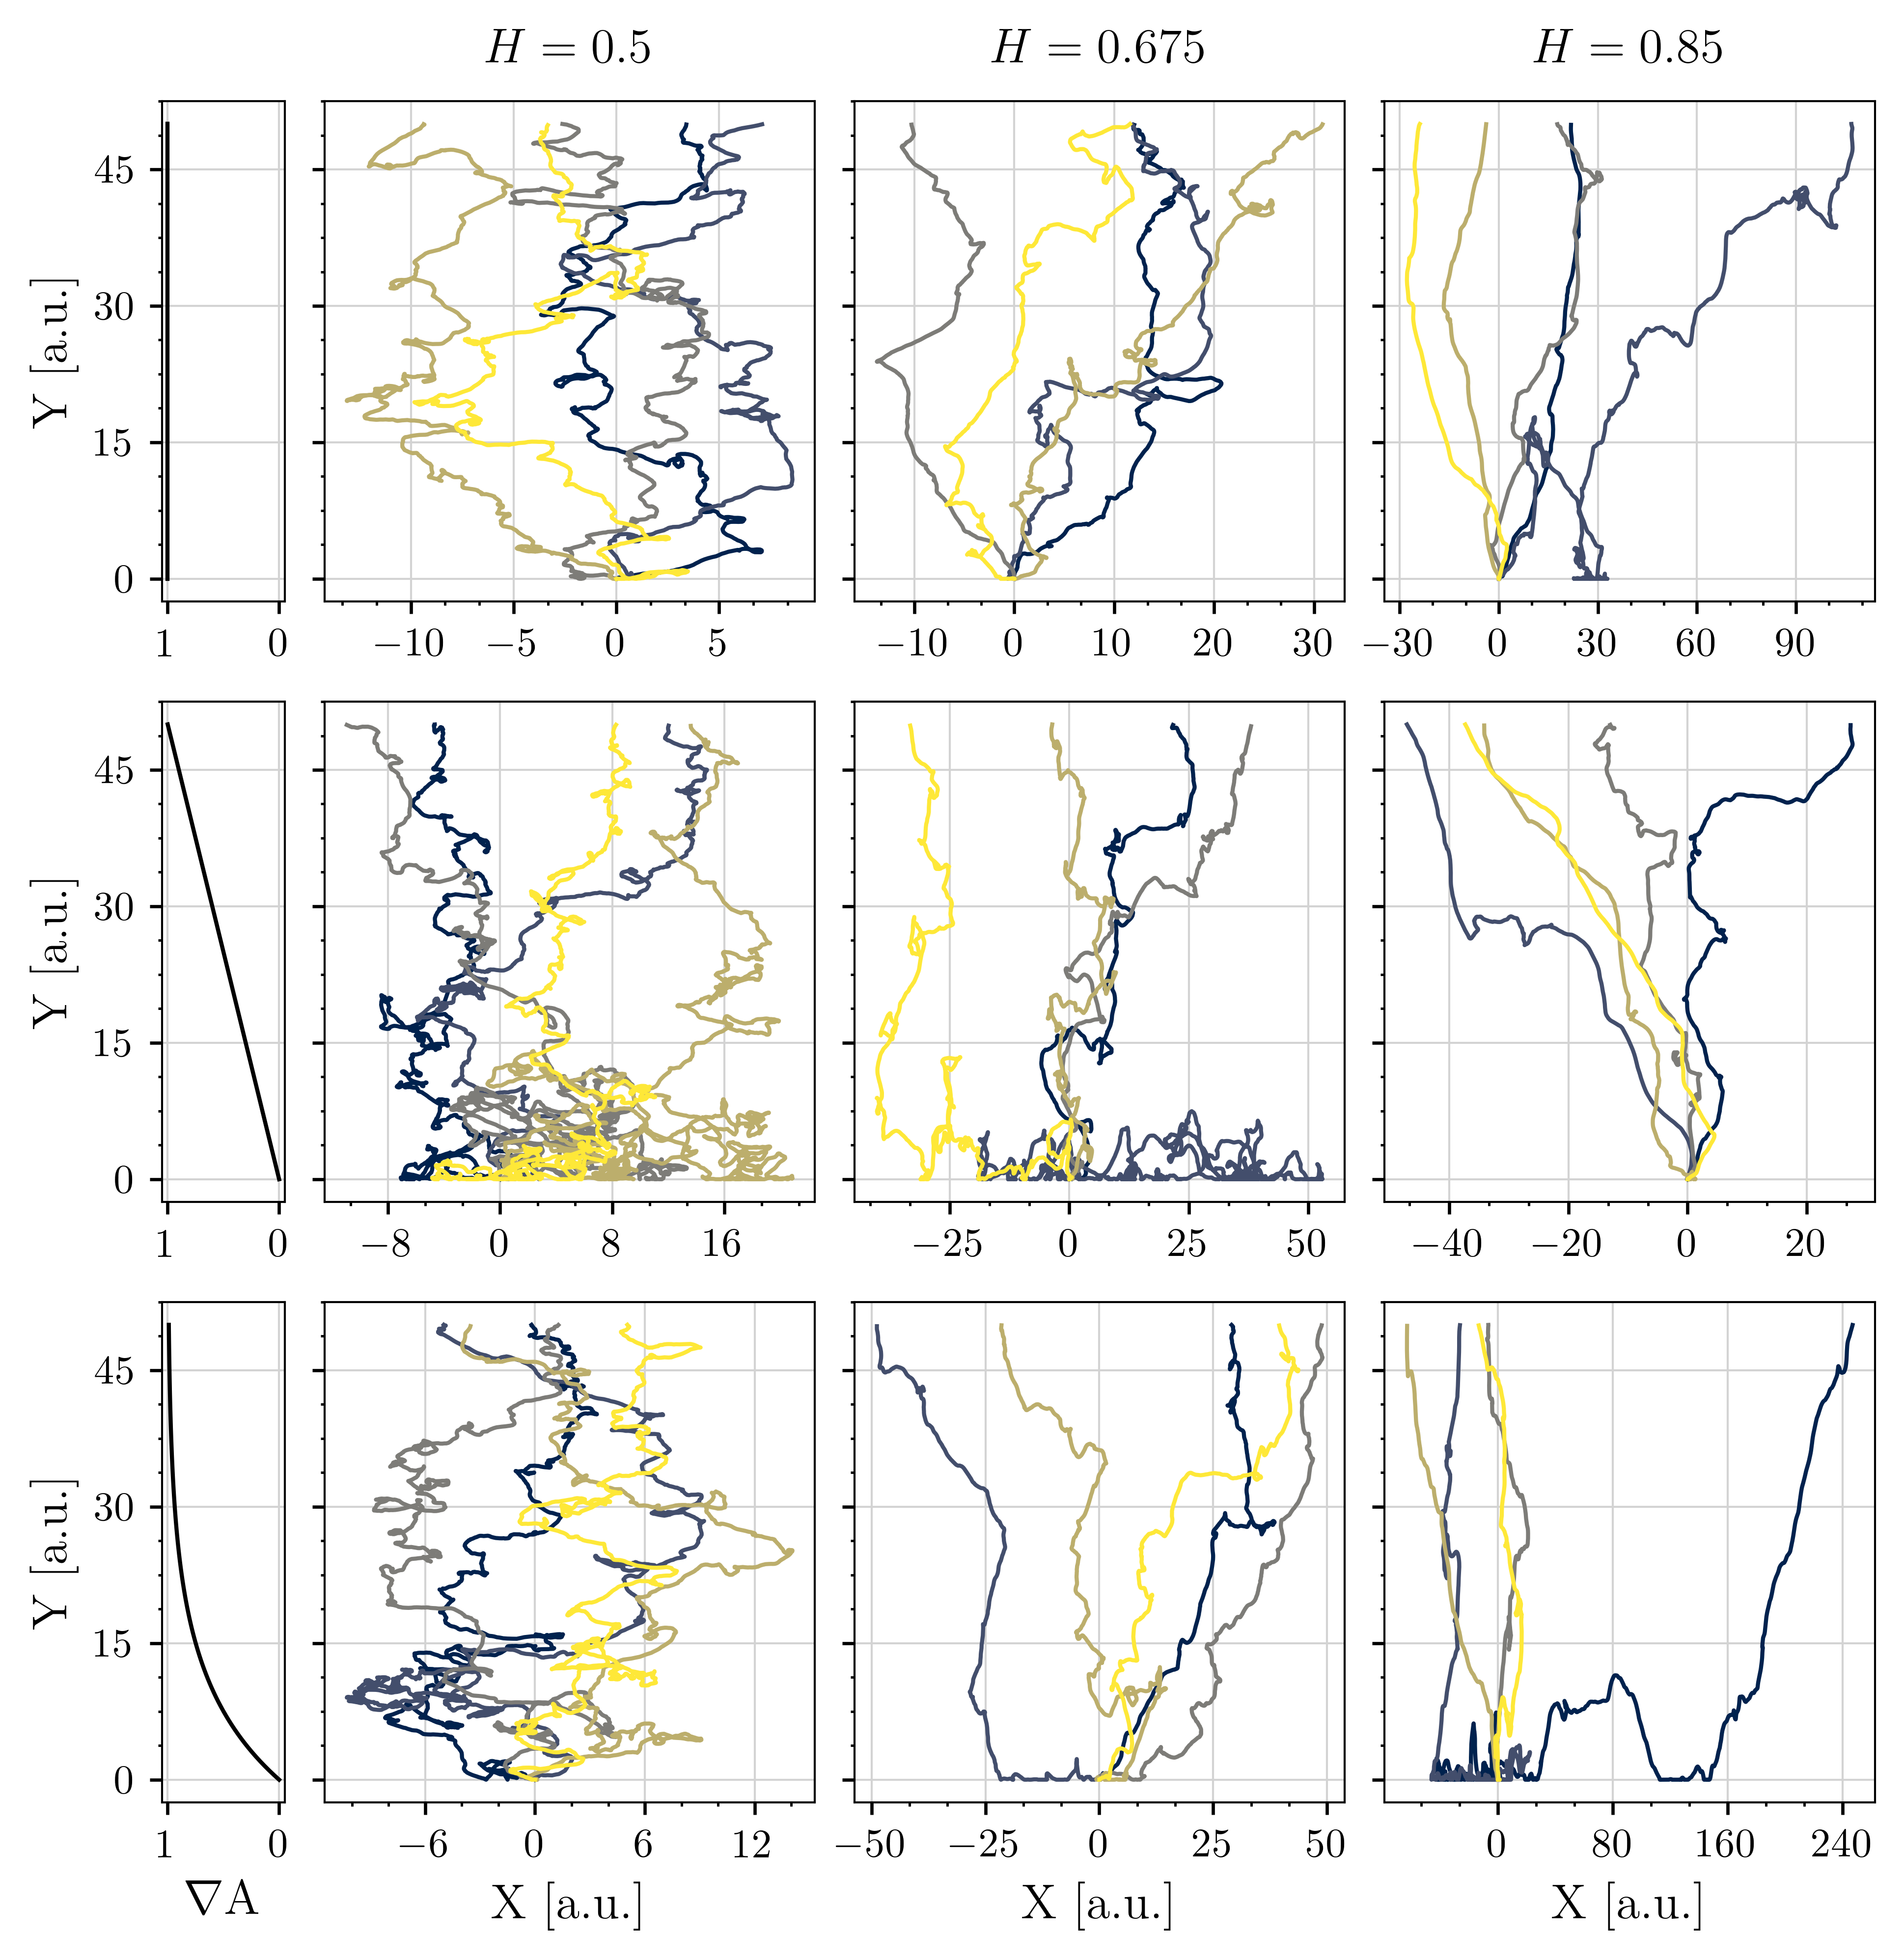

In [16]:

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 10,

    "ytick.labelsize": 10,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})
# for rep in figures['exp05']:
fig, ax = plt.subplot_mosaic(
    [['con_plot', 'con05', 'con0675', 'con085'],
    ['lin_plot', 'lin05', 'lin0675', 'lin085'],
    ['exp_plot', 'exp05', 'exp0675', 'exp085']],
   figsize=(7.5, 7.5),
   dpi = 600,
   gridspec_kw={'hspace': 0.2, 'wspace': 0.1,
                  'height_ratios': [1, 1, 1],
                  'width_ratios': [0.25, 1, 1, 1]},
   sharey=True,
    
)

keys = [ 'con05', 'con0675', 'con085', 'exp05', 'exp0675', 'exp085', 'lin05', 'lin0675', 'lin085']
norm = mcolors.Normalize(vmin=0, vmax= 4)
cmap = plt.cm.cividis
for key in keys:
    for i, rep in enumerate(figures[key]):
        ax[key].plot(rep.T[0], rep.T[1], linewidth = 1, color = cmap(norm(i)), zorder = 3)
        
y = np.linspace(0, 50, 100)

grads_const = [constant_gradient.calculate_gradient([0, x])[1] for x in y]

grads_exp = [exponential_gradient.calculate_gradient([0, x])[1] for x in y]

grads_lin = [linear_gradient.calculate_gradient([0, x])[1] for x in y]

ax['con_plot'].plot(grads_const, y, color = 'black', linewidth = 1)
ax['con_plot'].set_xticks([0, 1.0])
ax['con_plot'].set_xlim([-0.05, 1.05])
# ax['con_plot'].set_xlabel(r'$\nabla \phi$')
ax['con_plot'].set_ylabel(r'Y [a.u.]')
ax['con_plot'].invert_xaxis()
ax['lin_plot'].plot(grads_lin, y, color = 'black', linewidth = 1, )
ax['lin_plot'].set_xticks([0, 1.0])
ax['lin_plot'].set_xlim([-0.05, 1.05])

ax['lin_plot'].set_ylabel(r'Y [a.u.]')
ax['lin_plot'].invert_xaxis()
ax['exp_plot'].plot(grads_exp, y, color = 'black', linewidth = 1)
ax['exp_plot'].set_xticks([0, 1.0])
ax['exp_plot'].set_xlim([-0.05, 1.05])
ax['exp_plot'].set_ylabel(r'Y [a.u.]')
ax['exp_plot'].set_xlabel(r'$\nabla \mathrm{A}$')
ax['exp_plot'].invert_xaxis()

for key in keys:
    ax[key].xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax[key].xaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    ax[key].yaxis.set_major_locator(ticker.MaxNLocator(5))
    ax[key].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
    
for a in ax.values():
    a.grid(which='major', color='lightgray', linestyle='-', linewidth=0.5, zorder = 0)

ax['con05'].annotate(r'$H=0.5$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)

ax['con0675'].annotate(r'$H=0.675$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)
ax['con085'].annotate(r'$H=0.85$', xy=(0.5, 1.1),
            xycoords='axes fraction', ha='center', va='center',
            fontsize=12, color = 'black', zorder = 4)

ax['exp05'].set_xlabel(r'X [a.u.]')
ax['exp0675'].set_xlabel(r'X [a.u.]')
ax['exp085'].set_xlabel(r'X [a.u.]')



In [90]:
grads_exp

[np.float64(0.0),
 np.float64(0.04545154333816592),
 np.float64(0.08883724388451075),
 np.float64(0.13025099738221668),
 np.float64(0.16978243186802544),
 np.float64(0.20751710164608272),
 np.float64(0.24353667244537114),
 np.float64(0.27791909816145366),
 np.float64(0.3107387895650303),
 np.float64(0.342066775342432),
 np.float64(0.37197085581657474),
 np.float64(0.4005157496810591),
 np.float64(0.4277632340649783),
 np.float64(0.4537722782315659),
 np.float64(0.4785991712000315),
 np.float64(0.502297643566789),
 np.float64(0.5249189837897204),
 np.float64(0.5465121491871419),
 np.float64(0.5671238718916942),
 np.float64(0.5867987599884664),
 np.float64(0.6055793940562345),
 np.float64(0.6235064193207533),
 np.float64(0.6406186336195374),
 np.float64(0.6569530713685082),
 np.float64(0.6725450837122272),
 np.float64(0.6874284150311764),
 np.float64(0.7016352759716661),
 np.float64(0.7151964131564199),
 np.float64(0.728141175726706),
 np.float64(0.7404975788600263),
 np.float64(0.752292

# Histograms

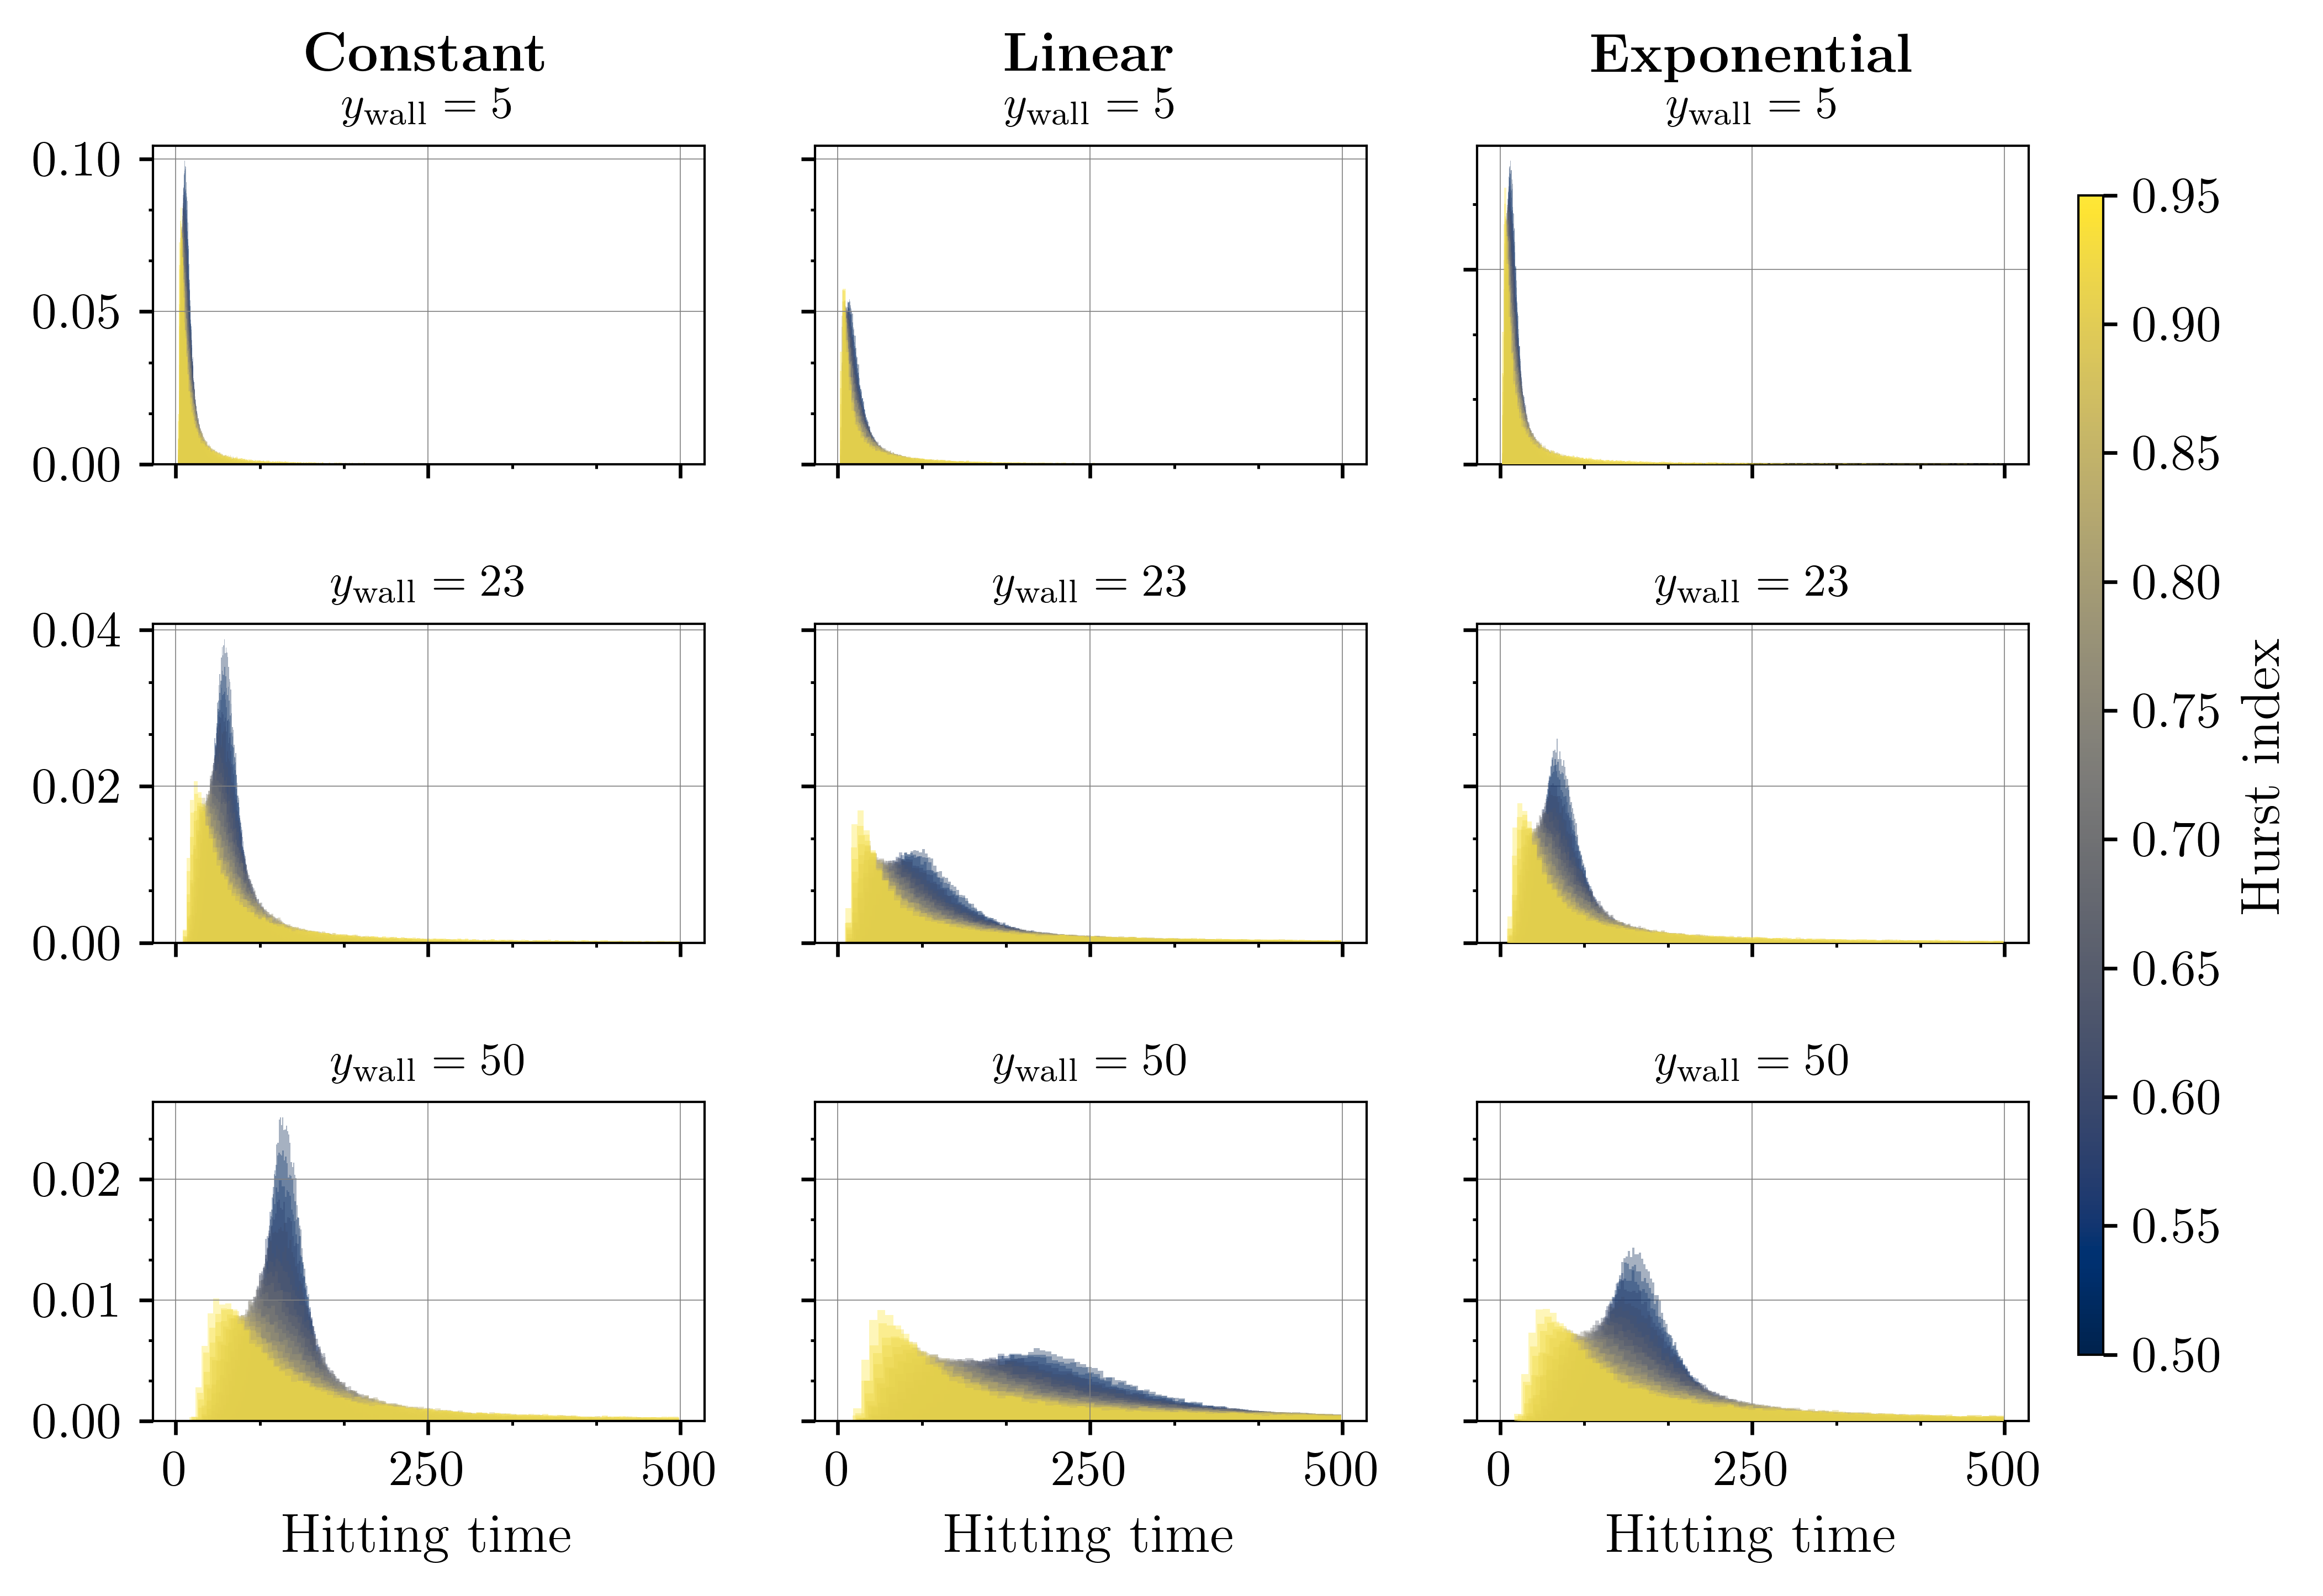

In [7]:
# 0.5 Consant

folder = 'constant_h_wall_cluster'

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
list_files = os.listdir(folder)

dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})

fig, ax = plt.subplot_mosaic(
    [['Constant5', 'Linear5', 'Exponential5'],
     ['Constant23', 'Linear23', 'Exponential23'],
     ['Constant50', 'Linear50', 'Exponential50']],
    # layout='constrained', 
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # gridspec_kw={"hspace": 0.5},
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)

h_values = sorted([x for x in list(dict5.keys()) if x != 0])
wall_values = [5, 23, 50]

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

# h05
c = 0
for h in h_values:
    df = dict5[h]
    df = df[df<499]
    ax['Constant5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                         zorder  = 1)
    c += 1
c = 0
for h in h_values:
    df = dict23[h]
    df = df[df<499]
    ax['Constant23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Constant50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

#----------- Linear
# 0.5 Consant

folder = 'linear_h_wall_cluster'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

h_values = sorted([x for x in list(dict5.keys()) if x != 0])

for h in h_values:
    df = dict5[h]
    df = df[df<499]
    ax['Linear5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                       zorder = 1)

for h in h_values:
    df = dict23[h]
    df = df[df<499]
    ax['Linear23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Linear50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

#----------- Exponential

folder = 'exponential_h_wall_cluster'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()
    
dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()
        

h_values = sorted([x for x in list(dict5.keys()) if x != 0])

# h05
c = 0
for h in h_values:
    df = dict5[h]
    df = df[df<499]
    ax['Exponential5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                            zorder = 3)
    c += 1
c = 0
for h in h_values:
    df = dict23[h]
    df = df[df<499]
    ax['Exponential23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Exponential50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

# ----------- Color bar

### Color bar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['Constant5'].set_xticks([0,250, 500])
ax['Constant50'].set_xlabel('Hitting time', fontsize=12)
ax['Linear50'].set_xlabel('Hitting time', fontsize=12)
ax['Exponential50'].set_xlabel('Hitting time', fontsize=12)

# Y-axis
y_limc5 = ax['Constant5'].get_ylim()
y_limc23 = ax['Constant23'].get_ylim()
y_limc50 = ax['Constant50'].get_ylim()
ax['Constant5'].set_ylim(y_limc5)
ax['Linear23'].set_ylim(y_limc23)
ax['Linear50'].set_ylim(y_limc50)
ax['Linear5'].set_ylim(y_limc5)
ax['Exponential23'].set_ylim(y_limc23)
ax['Exponential50'].set_ylim(y_limc50)
# eliminate the y axis
ax['Linear5'].set_yticklabels([])
ax['Exponential5'].set_yticklabels([])
ax['Linear23'].set_yticklabels([])
ax['Exponential23'].set_yticklabels([])
ax['Linear50'].set_yticklabels([])
ax['Exponential50'].set_yticklabels([])



# Titles
ax['Constant5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Constant23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Constant50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Linear5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Linear23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Linear50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Exponential5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Exponential23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Exponential50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)

# labels

ax['Constant5'].annotate(
    r'\textbf{Constant}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Linear5'].annotate(
    r'\textbf{Linear}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Exponential5'].annotate(
    r'\textbf{Exponential}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)


for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle='-', linewidth=0.2, zorder = 0)
    
fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=600, bbox_inches='tight')

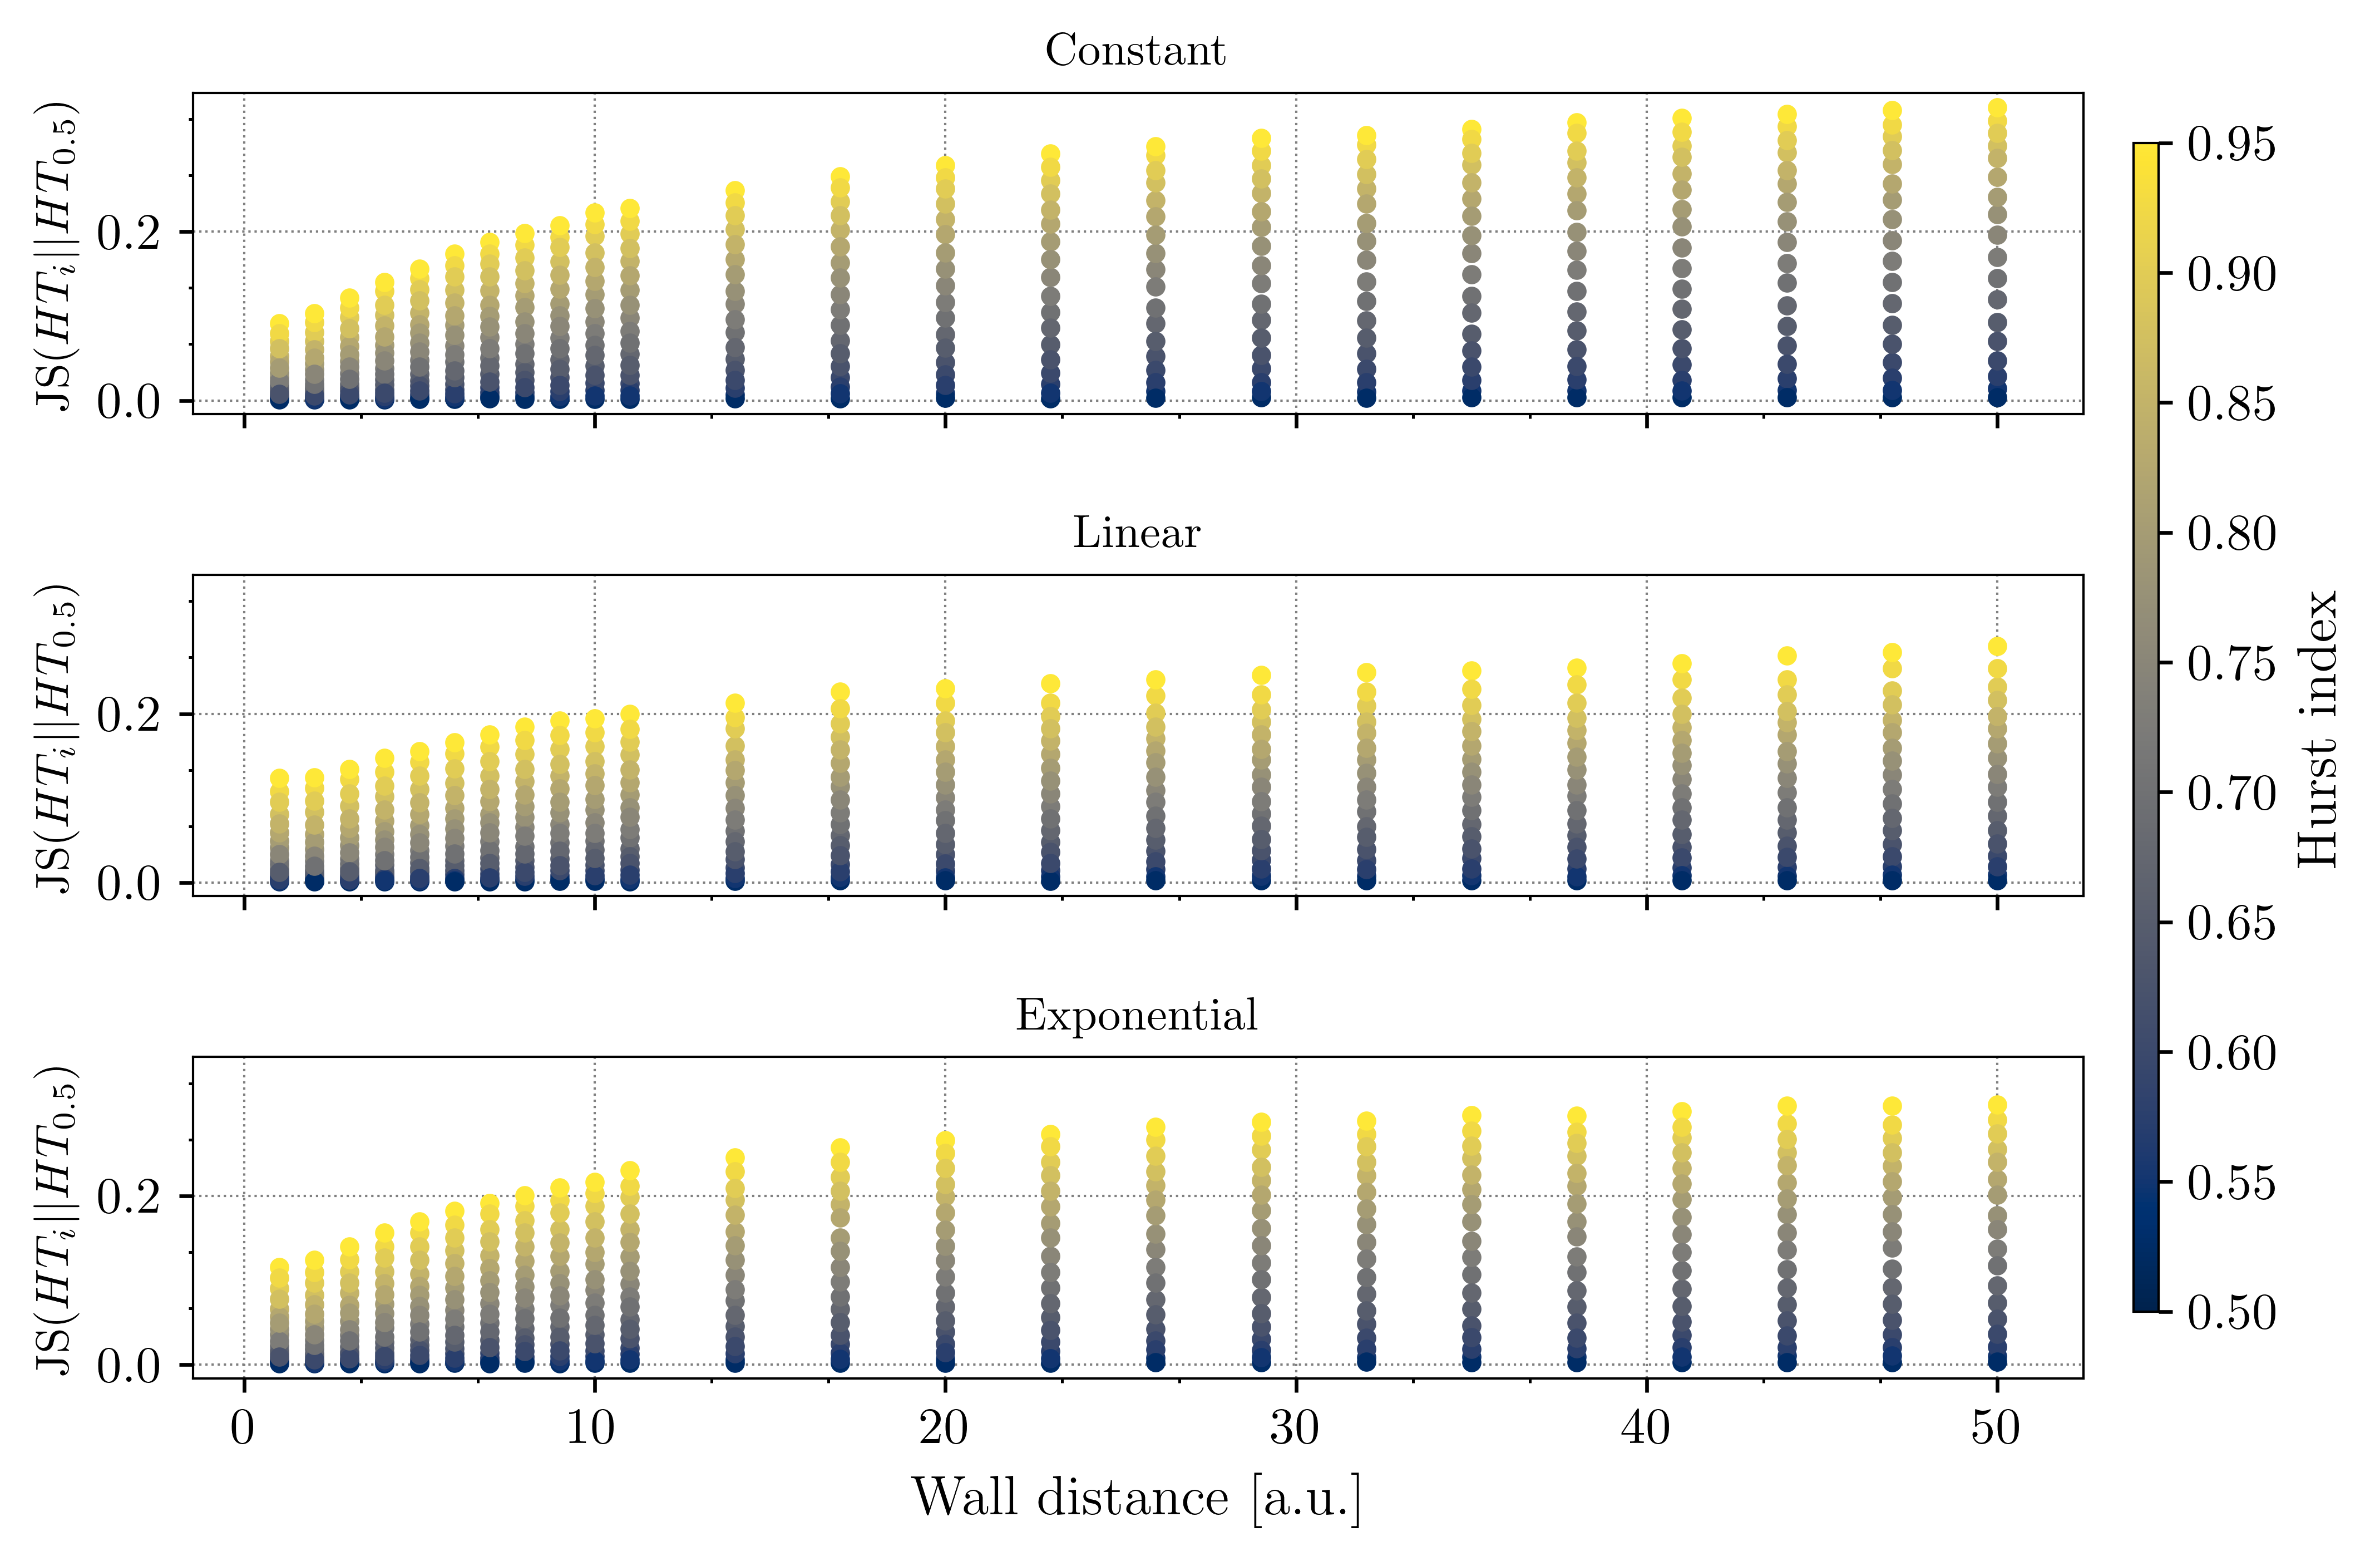

In [8]:
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2


fig, ax = plt.subplot_mosaic(
    [['JSConstant'],
     ['JSLinear'],
     ['JSExponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    sharey=True,
    gridspec_kw={"hspace": 0.5},
)



# constant
folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)
wall_val = {}


h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in wall_val.keys() and wall >= 1:
        wall_val[wall] = {}
    if h == 0.5:
        df = pd.read_csv(join(folder, archiv))
        wall_val[wall] = df.to_numpy()
    if h not in h_values:
        h_values.append(h)

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if h != 0.5 and wall >= 1:
        df_1 = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        df_2 = wall_val[wall] # h = 0.5
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['JSConstant'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
                                 

# linear
folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
wall_val = {}
h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in wall_val.keys() and wall >= 1:
        wall_val[wall] = {}
    if h == 0.5:
        df = pd.read_csv(join(folder, archiv))
        wall_val[wall] = df.to_numpy()
    if h not in h_values:
        h_values.append(h)

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if h != 0.5 and wall >= 1:
        df_1 = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        df_2 = wall_val[wall] # h = 0.5
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['JSLinear'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
        
# exponential
folder = 'exponential_h_wall_cluster'
list_files = os.listdir(folder)
wall_val = {}
h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in wall_val.keys() and wall >= 1:
        wall_val[wall] = {}
    if h == 0.5:
        df = pd.read_csv(join(folder, archiv))
        wall_val[wall] = df.to_numpy()
    if h not in h_values:
        h_values.append(h)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if h != 0.5 and wall >= 1:
        df_1 = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        df_2 = wall_val[wall] # h = 0.5
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['JSExponential'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )

# X-axis 

ax['JSExponential'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# Y-axis
ax['JSConstant'].set_ylabel(r'$\mathrm{JS}(HT_i||HT_{0.5})$', fontsize = 10)
ax['JSLinear'].set_ylabel(r'$\mathrm{JS}(HT_i||HT_{0.5})$', fontsize = 10)
ax['JSExponential'].set_ylabel(r'$\mathrm{JS}(HT_i||HT_{0.5})$', fontsize = 10)

# titles
ax['JSConstant'].set_title(r'Constant', fontsize = 10)
ax['JSLinear'].set_title(r'Linear', fontsize = 10)
ax['JSExponential'].set_title(r'Exponential', fontsize = 10)

### colorbar

fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
fig.savefig(join('figures', 'hitting_time_distribution_jsdiv.pdf'), dpi=600, bbox_inches='tight')


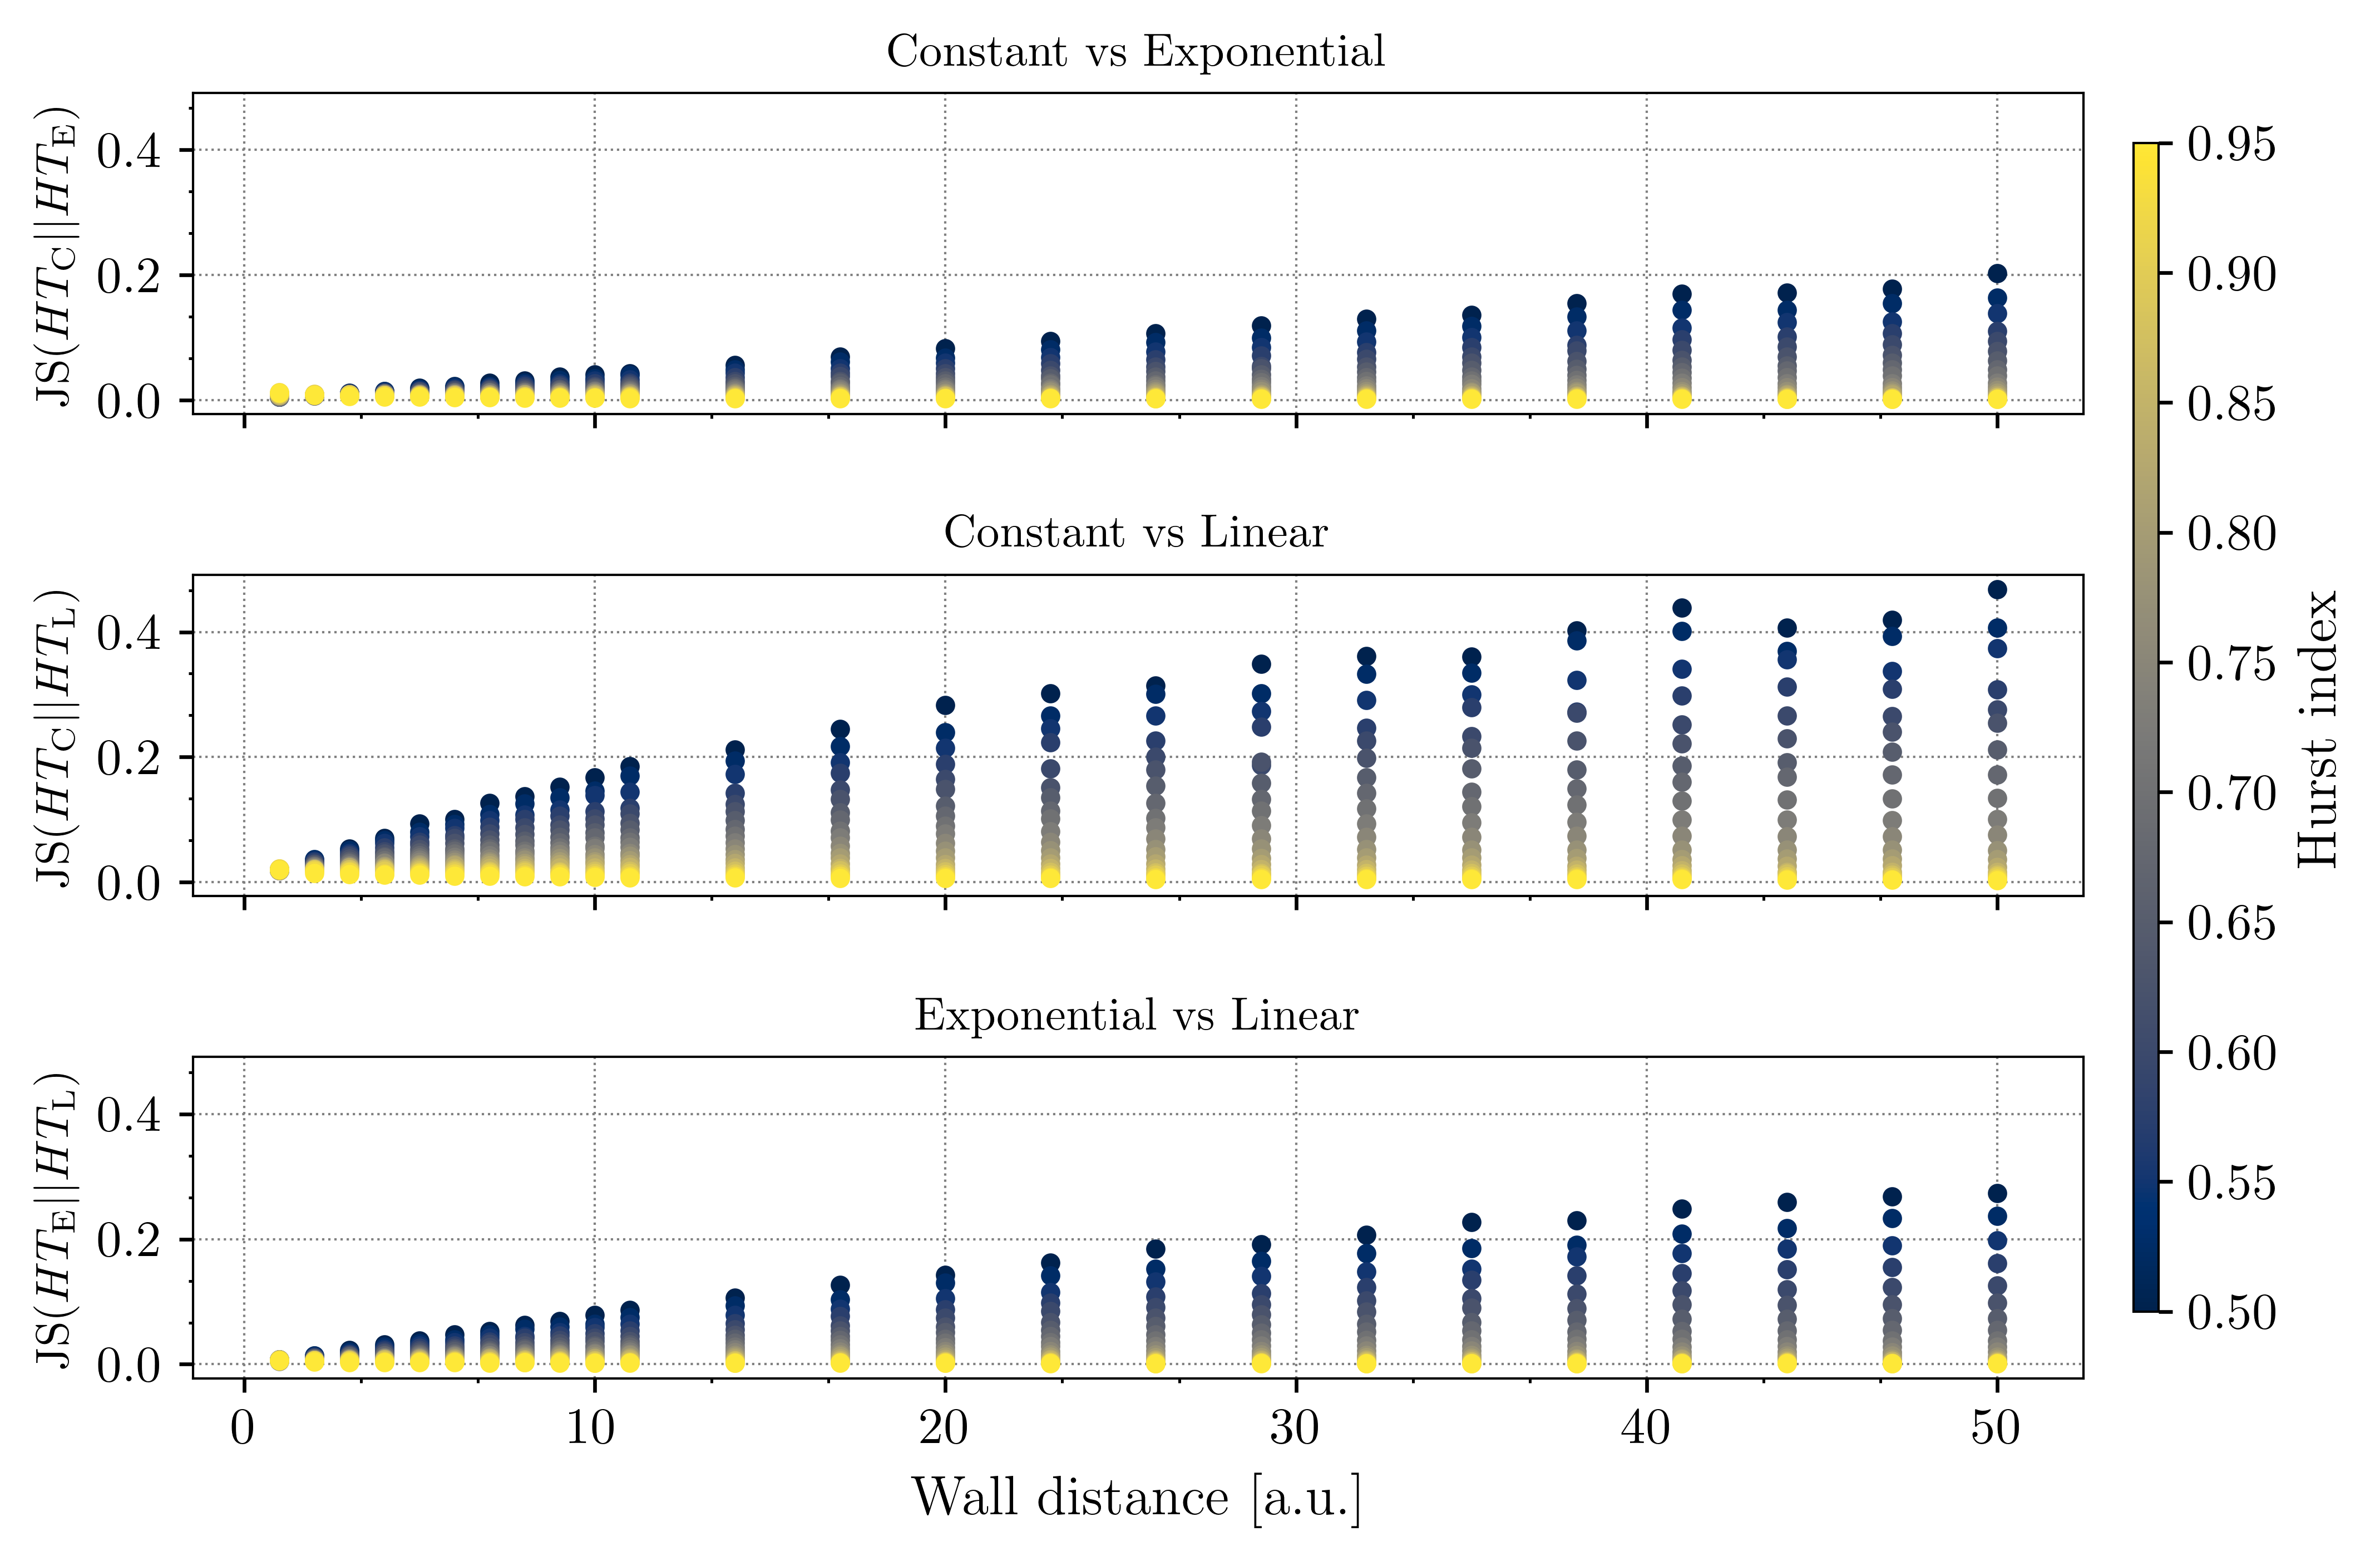

In [9]:
## distance between the different conditions
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2



folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)
dict_wall_h_constant = {}

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = np.round(float(archiv2[0].split('_')[1]),3)
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in dict_wall_h_constant.keys() and wall >= 1:
        dict_wall_h_constant[wall] = {}
    if wall == 0:
        continue    
    if h not in dict_wall_h_constant[wall].keys():
        dict_wall_h_constant[wall][h] = None
    df = pd.read_csv(join(folder, archiv))
    dict_wall_h_constant[wall][h] = df.to_numpy()
    

folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
dict_wall_h_linear = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = np.round(float(archiv2[0].split('_')[1]),3)
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in dict_wall_h_linear.keys() and wall >= 1:
        dict_wall_h_linear[wall] = {}
    if wall == 0:
        continue    
    if h not in dict_wall_h_linear[wall].keys():
        dict_wall_h_linear[wall][h] = None
    df = pd.read_csv(join(folder, archiv))
    dict_wall_h_linear[wall][h] = df.to_numpy()
    
    
folder = 'exponential_h_wall_cluster'
dict_wall_h_exponential = {}
list_files = os.listdir(folder)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = np.round(float(archiv2[0].split('_')[1]),3)
    wall = int(float(archiv2[1].split('_')[1]))
    if wall not in dict_wall_h_exponential.keys() and wall >= 1:
        dict_wall_h_exponential[wall] = {}
    if wall == 0:
        continue    
    if h not in dict_wall_h_exponential[wall].keys():
        dict_wall_h_exponential[wall][h] = None
    df = pd.read_csv(join(folder, archiv))
    dict_wall_h_exponential[wall][h] = df.to_numpy()

fig, ax = plt.subplot_mosaic(
    [['ConstantVSExponential'],
     ['ConstantVSLinear'],
     ['ExponentialVSLinear']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    sharey=True,
    gridspec_kw={"hspace": 0.5},
)

#%% Constant vs Exponential
h_values = sorted([x for x in list(dict_wall_h_constant[5].keys()) if x != 0])
norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for wall in dict_wall_h_constant.keys():
    for h in h_values:
        # constant
        df_1 = dict_wall_h_constant[wall][h]
        # exponential
        df_2 = dict_wall_h_exponential[wall][h] 
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['ConstantVSExponential'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
        
#%% Constant vs Linear

for wall in dict_wall_h_constant.keys():
    for h in h_values:
        # constant
        df_1 = dict_wall_h_constant[wall][h]
        # linear
        df_2 = dict_wall_h_linear[wall][h] 
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['ConstantVSLinear'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
#%% Exponential vs Linear

for wall in dict_wall_h_exponential.keys():
    for h in h_values:
        # exponential
        df_1 = dict_wall_h_exponential[wall][h]
        # linear
        df_2 = dict_wall_h_linear[wall][h] 
        # filter for no 499< values
        df_1 = df_1[df_1<499]
        df_2 = df_2[df_2<499]
        # calculate the histogram so that they are the same in binning
        hist_1, bin_edges_1 = np.histogram(df_1, bins='auto', density=True)
        hist_2, bin_edges_2 = np.histogram(df_2, bins=bin_edges_1, density=True)
        # calculate the JS divergence
        js_div = js_divergence(hist_1, hist_2)
        # plot the JS divergence
        ax['ExponentialVSLinear'].scatter(wall, js_div, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
# cbar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['ExponentialVSLinear'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# titles
ax['ConstantVSExponential'].set_title(r'Constant vs Exponential', fontsize = 10)
ax['ConstantVSLinear'].set_title(r'Constant vs Linear', fontsize = 10)
ax['ExponentialVSLinear'].set_title(r'Exponential vs Linear', fontsize = 10)

# y-axis
ax['ConstantVSExponential'].set_ylabel(r'$\mathrm{JS}(HT_{\mathrm{C}}||HT_{\mathrm{E}})$', fontsize = 10)
ax['ConstantVSLinear'].set_ylabel(r'$\mathrm{JS}(HT_{\mathrm{C}}||HT_{\mathrm{L}})$', fontsize = 10)
ax['ExponentialVSLinear'].set_ylabel(r'$\mathrm{JS}(HT_{\mathrm{E}}||HT_{\mathrm{L}})$', fontsize = 10)
# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
fig.savefig(join('figures', 'hitting_time_distribution_jsdiv_between_dist.pdf'), dpi=600, bbox_inches='tight')

## individual Distributions

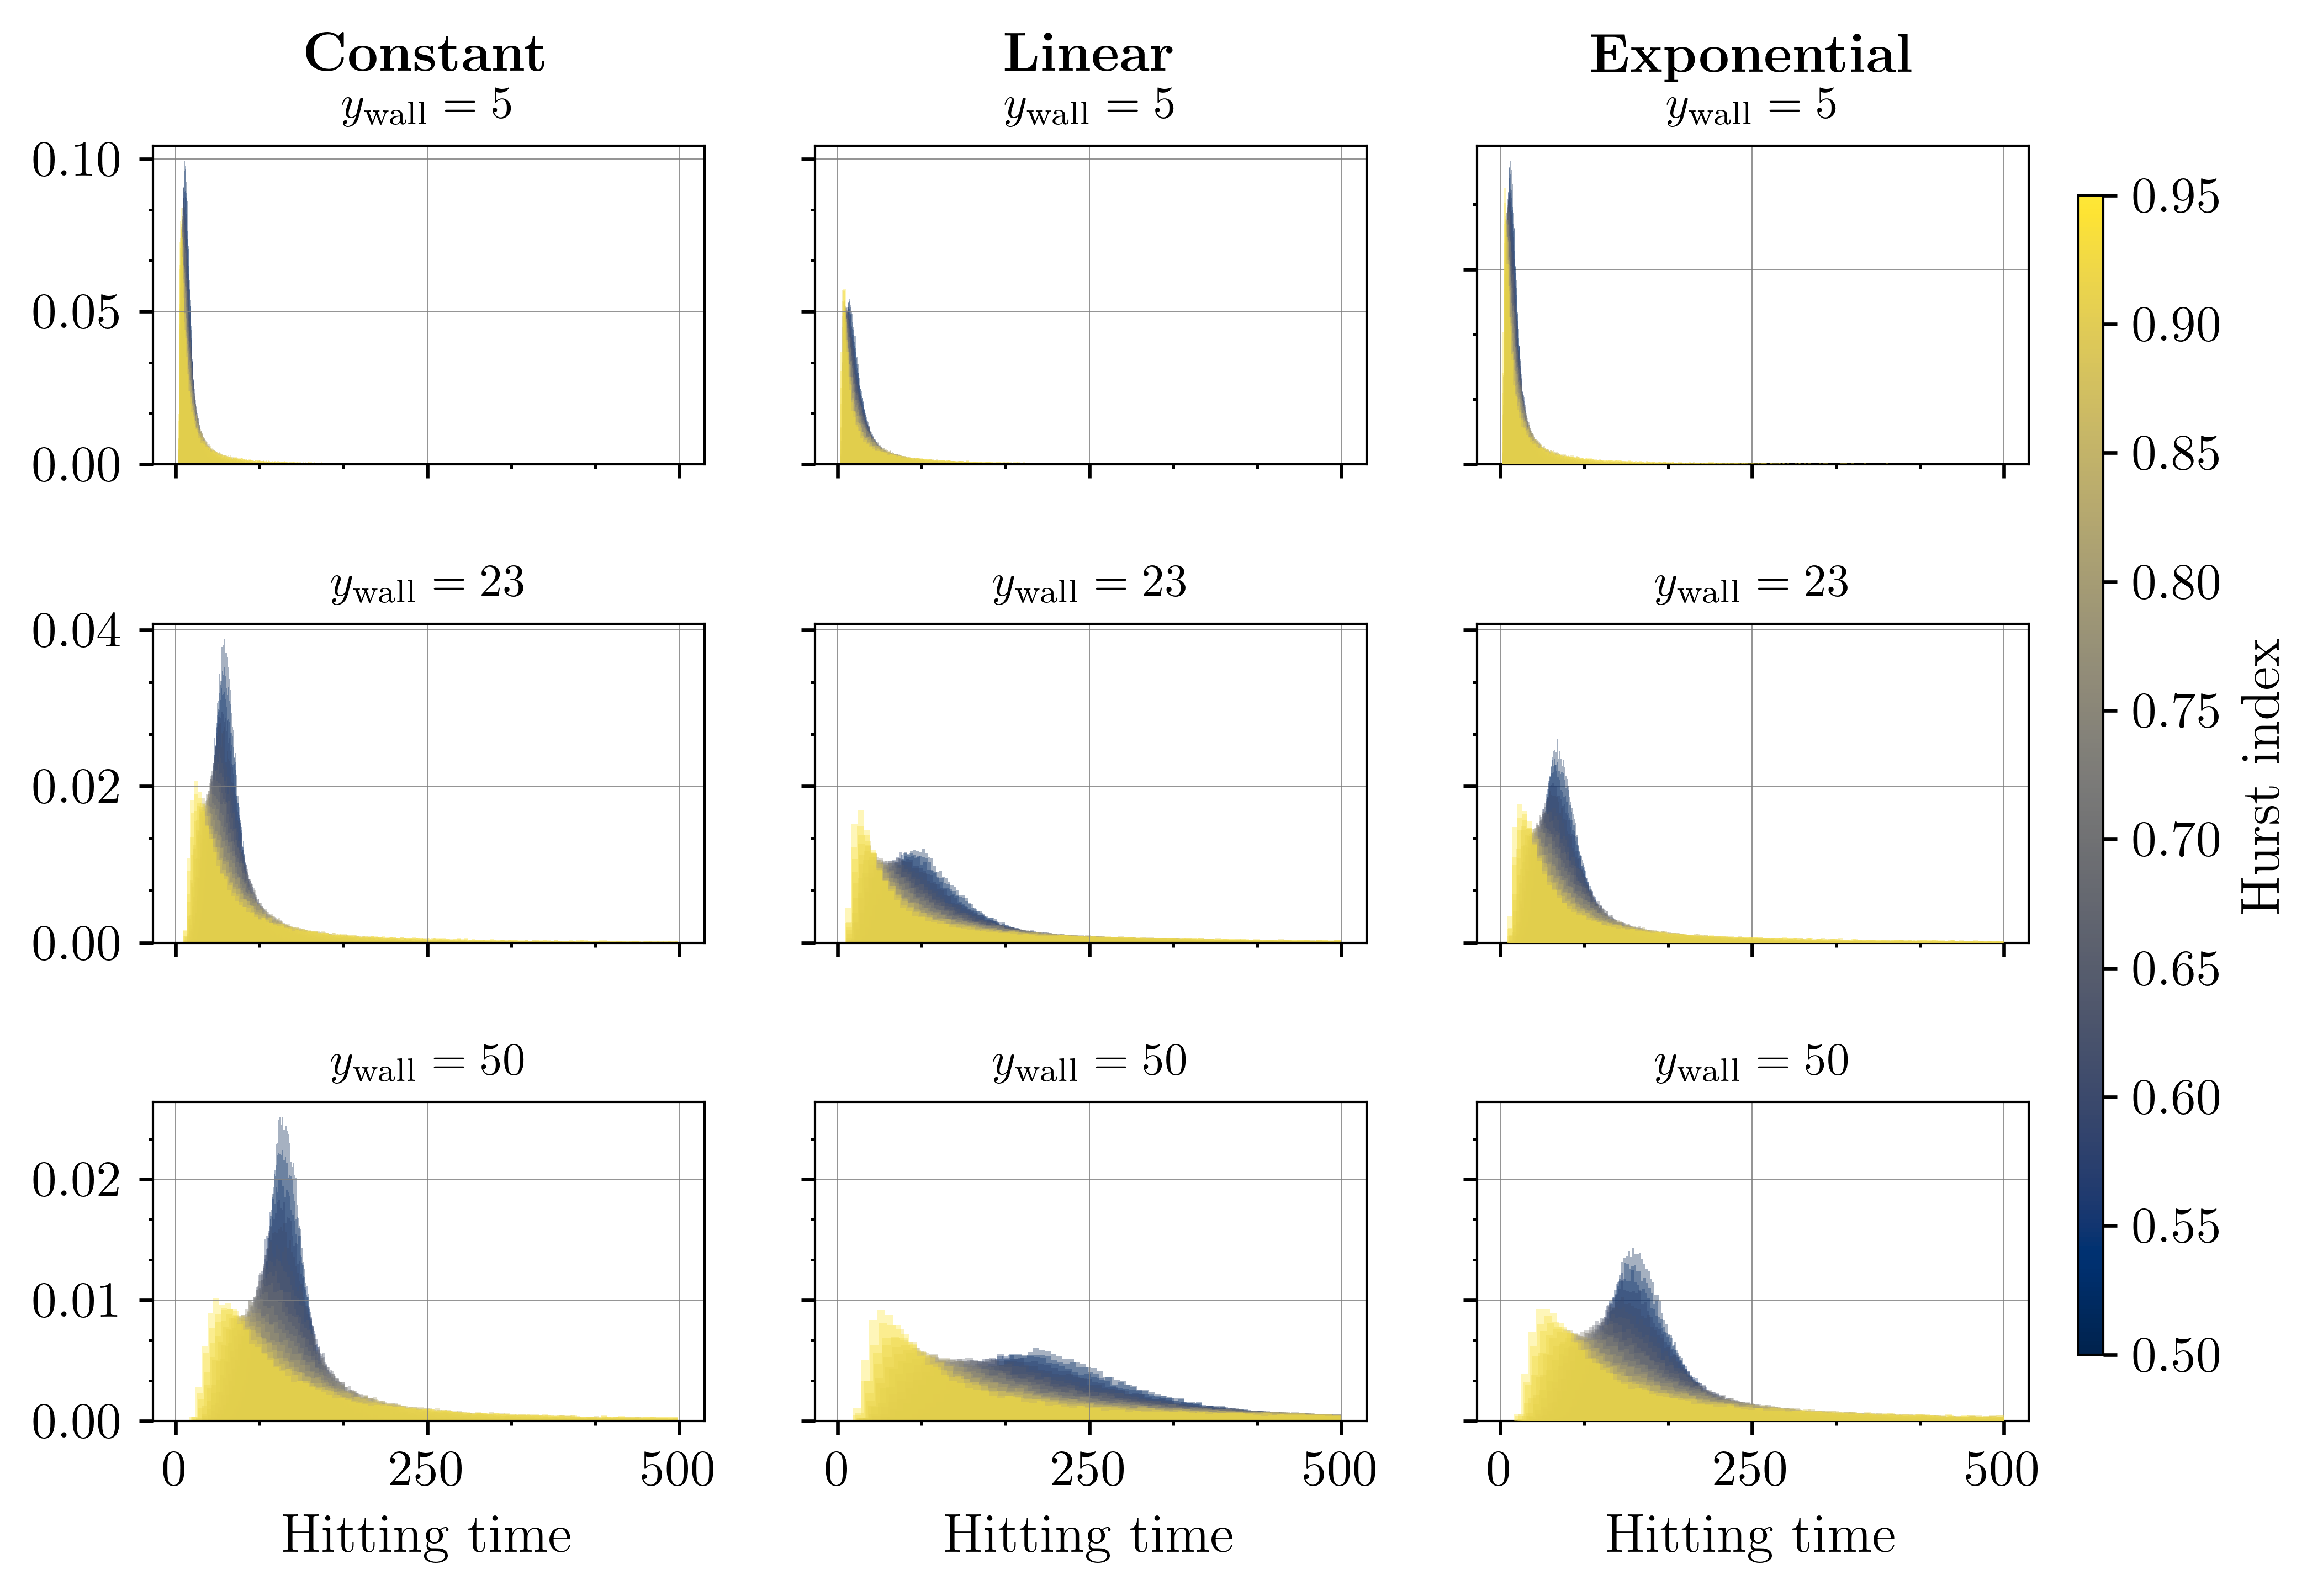

In [26]:
# 0.5 Consant

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)

dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})

fig, ax = plt.subplot_mosaic(
    [['Constant5', 'Linear5', 'Exponential5'],
     ['Constant23', 'Linear23', 'Exponential23'],
     ['Constant50', 'Linear50', 'Exponential50']],
    # layout='constrained', 
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # gridspec_kw={"hspace": 0.5},
    width_ratios=[1, 1, 1],
    height_ratios=[1, 1, 1],
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)

h_values = sorted([x for x in list(dict5.keys()) if x != 0])
wall_values = [5, 23, 50]

norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

# h05
c = 0
for h in h_values:
    df = dict5[h]
    df = df[df<499]
    ax['Constant5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                         zorder  = 1)
    c += 1
c = 0
for h in h_values:
    df = dict23[h]
    df = df[df<499]
    ax['Constant23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Constant50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                          zorder = 1)
    c += 1
    c += 1

#----------- Linear
# 0.5 Consant

folder = 'linear_h_wall_cluster'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()

dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()

h_values = sorted([x for x in list(dict5.keys()) if x != 0])

for h in h_values:
    df = dict5[h]
    df = df[df<499]
    ax['Linear5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                       zorder = 1)

for h in h_values:
    df = dict23[h]
    df = df[df<499]
    ax['Linear23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

for h in h_values:
    df = dict50[h]
    df = df[df<499]
    ax['Linear50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                        zorder = 1)

#----------- Exponential

folder = 'exponential_h_wall_cluster'

# import os 
# import pandas as pd
# import numpy as np
# from os.path import join
# import seaborn as sns
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm
# import matplotlib.colors as mcolors

list_files = os.listdir(folder)
        
dict5 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 5:
        if h not in dict5:
            dict5[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict5[h] = df.to_numpy()

dict23 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 23:
        if h not in dict23:
            dict23[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict23[h] = df.to_numpy()
    
dict50 = {}
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = float(archiv2[1].split('_')[1])
    if wall == 50:
        if h not in dict50:
            dict50[h] = None
        df = pd.read_csv(join(folder, archiv))
        dict50[h] = df.to_numpy()
        

h_values = sorted([x for x in list(dict5.keys()) if x != 0])

# h05
c = 0
for h in h_values:
    df = dict5[h]
    df = df[df<499.999]
    ax['Exponential5'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                            zorder = 3)
    c += 1
c = 0
for h in h_values:
    df = dict23[h]
    df = df[df<499.999]
    ax['Exponential23'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

c = 0
for h in h_values:
    df = dict50[h]
    df = df[df<499.999]
    ax['Exponential50'].hist(df, bins='auto', density=True, alpha=0.35, label=f'Hurst Index = {h:.2f}', color=cmap(norm(h)),
                             zorder = 3)
    c += 1
    c += 1

# ----------- Color bar

### Color bar
fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# X-axis
ax['Constant5'].set_xticks([0,250, 500])
ax['Constant50'].set_xlabel('Hitting time', fontsize=12)
ax['Linear50'].set_xlabel('Hitting time', fontsize=12)
ax['Exponential50'].set_xlabel('Hitting time', fontsize=12)

# Y-axis
y_limc5 = ax['Constant5'].get_ylim()
y_limc23 = ax['Constant23'].get_ylim()
y_limc50 = ax['Constant50'].get_ylim()
ax['Constant5'].set_ylim(y_limc5)
ax['Linear23'].set_ylim(y_limc23)
ax['Linear50'].set_ylim(y_limc50)
ax['Linear5'].set_ylim(y_limc5)
ax['Exponential23'].set_ylim(y_limc23)
ax['Exponential50'].set_ylim(y_limc50)
# eliminate the y axis
ax['Linear5'].set_yticklabels([])
ax['Exponential5'].set_yticklabels([])
ax['Linear23'].set_yticklabels([])
ax['Exponential23'].set_yticklabels([])
ax['Linear50'].set_yticklabels([])
ax['Exponential50'].set_yticklabels([])



# Titles
ax['Constant5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Constant23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Constant50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Linear5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Linear23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Linear50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)
ax['Exponential5'].set_title(r'$y_{\mathrm{wall}} = 5$', fontsize = 10)
ax['Exponential23'].set_title(r'$y_{\mathrm{wall}} = 23$', fontsize = 10)
ax['Exponential50'].set_title(r'$y_{\mathrm{wall}} = 50$', fontsize = 10)

# labels

ax['Constant5'].annotate(
    r'\textbf{Constant}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Linear5'].annotate(
    r'\textbf{Linear}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)

ax['Exponential5'].annotate(
    r'\textbf{Exponential}',
    xy = (0.5, 1.2), xycoords='axes fraction',
    ha='center', va='bottom',
    fontsize=12
)


for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle='-', linewidth=0.2, zorder = 0)
    
fig.savefig(join('figures', 'hitting_time_distribution_all.pdf'), dpi=600, bbox_inches='tight')

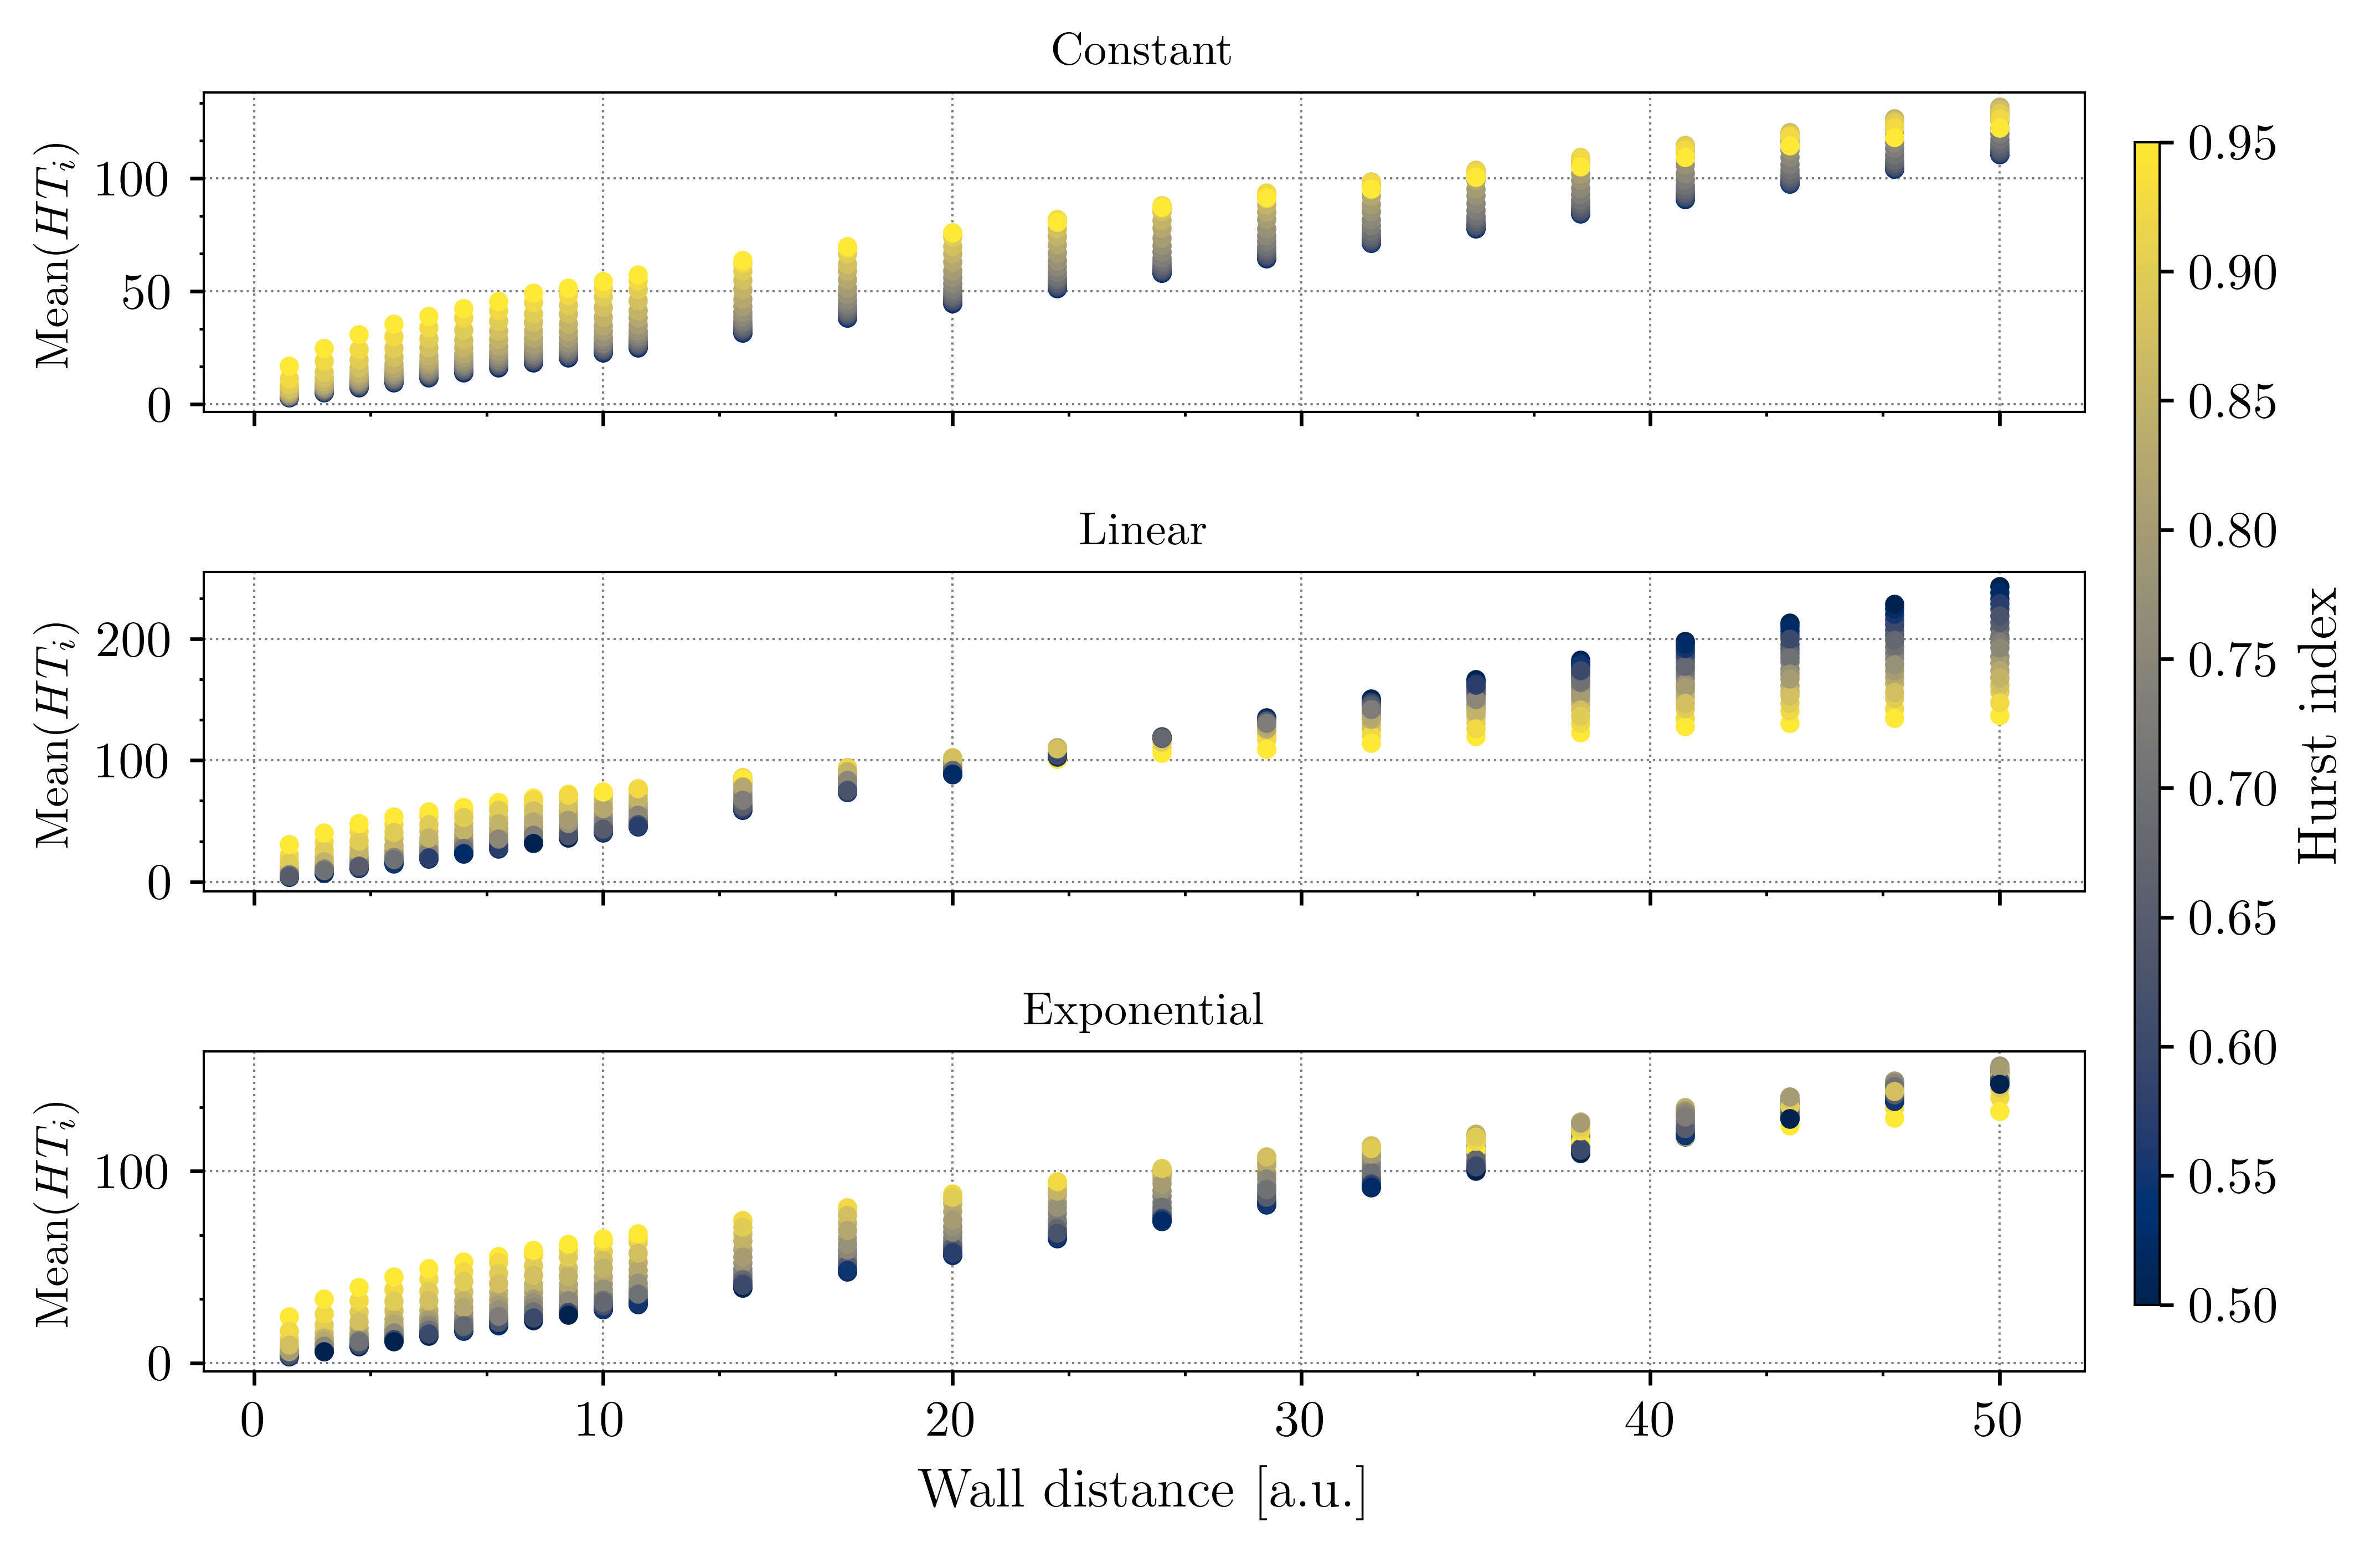

In [43]:
### Moments plot first moment

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

### Constant
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)



# constant
folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)



h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if h not in h_values:
        h_values.append(h)




norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        dist = dist[dist<499.999]
        
        # Calculate first moment
        first_momnt = np.mean(dist)
        ax['Constant'].scatter(wall, first_momnt, 
                                    color = cmap(norm(h)),
                                    s = 10, alpha = 1,
                                    zorder = 3 + 10*h
                                )
                                    

# linear
folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        dist = dist[dist<499.999]
        # calculate the first moment
        first_momnt = np.mean(dist, )
        # plot the fist moment
        ax['Linear'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
        
# exponential
folder = 'exponential_h_wall_cluster'
list_files = os.listdir(folder)

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if  wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499.999]
        # calculate the first moment
        first_momnt = np.mean(dist)
        # plot the fist moment
        ax['Exponential'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )

# # X-axis 

ax['Exponential'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# Y-axis
ax['Constant'].set_ylabel(r'$\mathrm{Mean}(HT_i)$', fontsize = 10)
ax['Linear'].set_ylabel(r'$\mathrm{Mean}(HT_i)$', fontsize = 10)
ax['Exponential'].set_ylabel(r'$\mathrm{Mean}(HT_i)$', fontsize = 10)

# titles
ax['Constant'].set_title(r'Constant', fontsize = 10)
ax['Linear'].set_title(r'Linear', fontsize = 10)
ax['Exponential'].set_title(r'Exponential', fontsize = 10)

### colorbar

fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_jsdiv.pdf'), dpi=600, bbox_inches='tight')



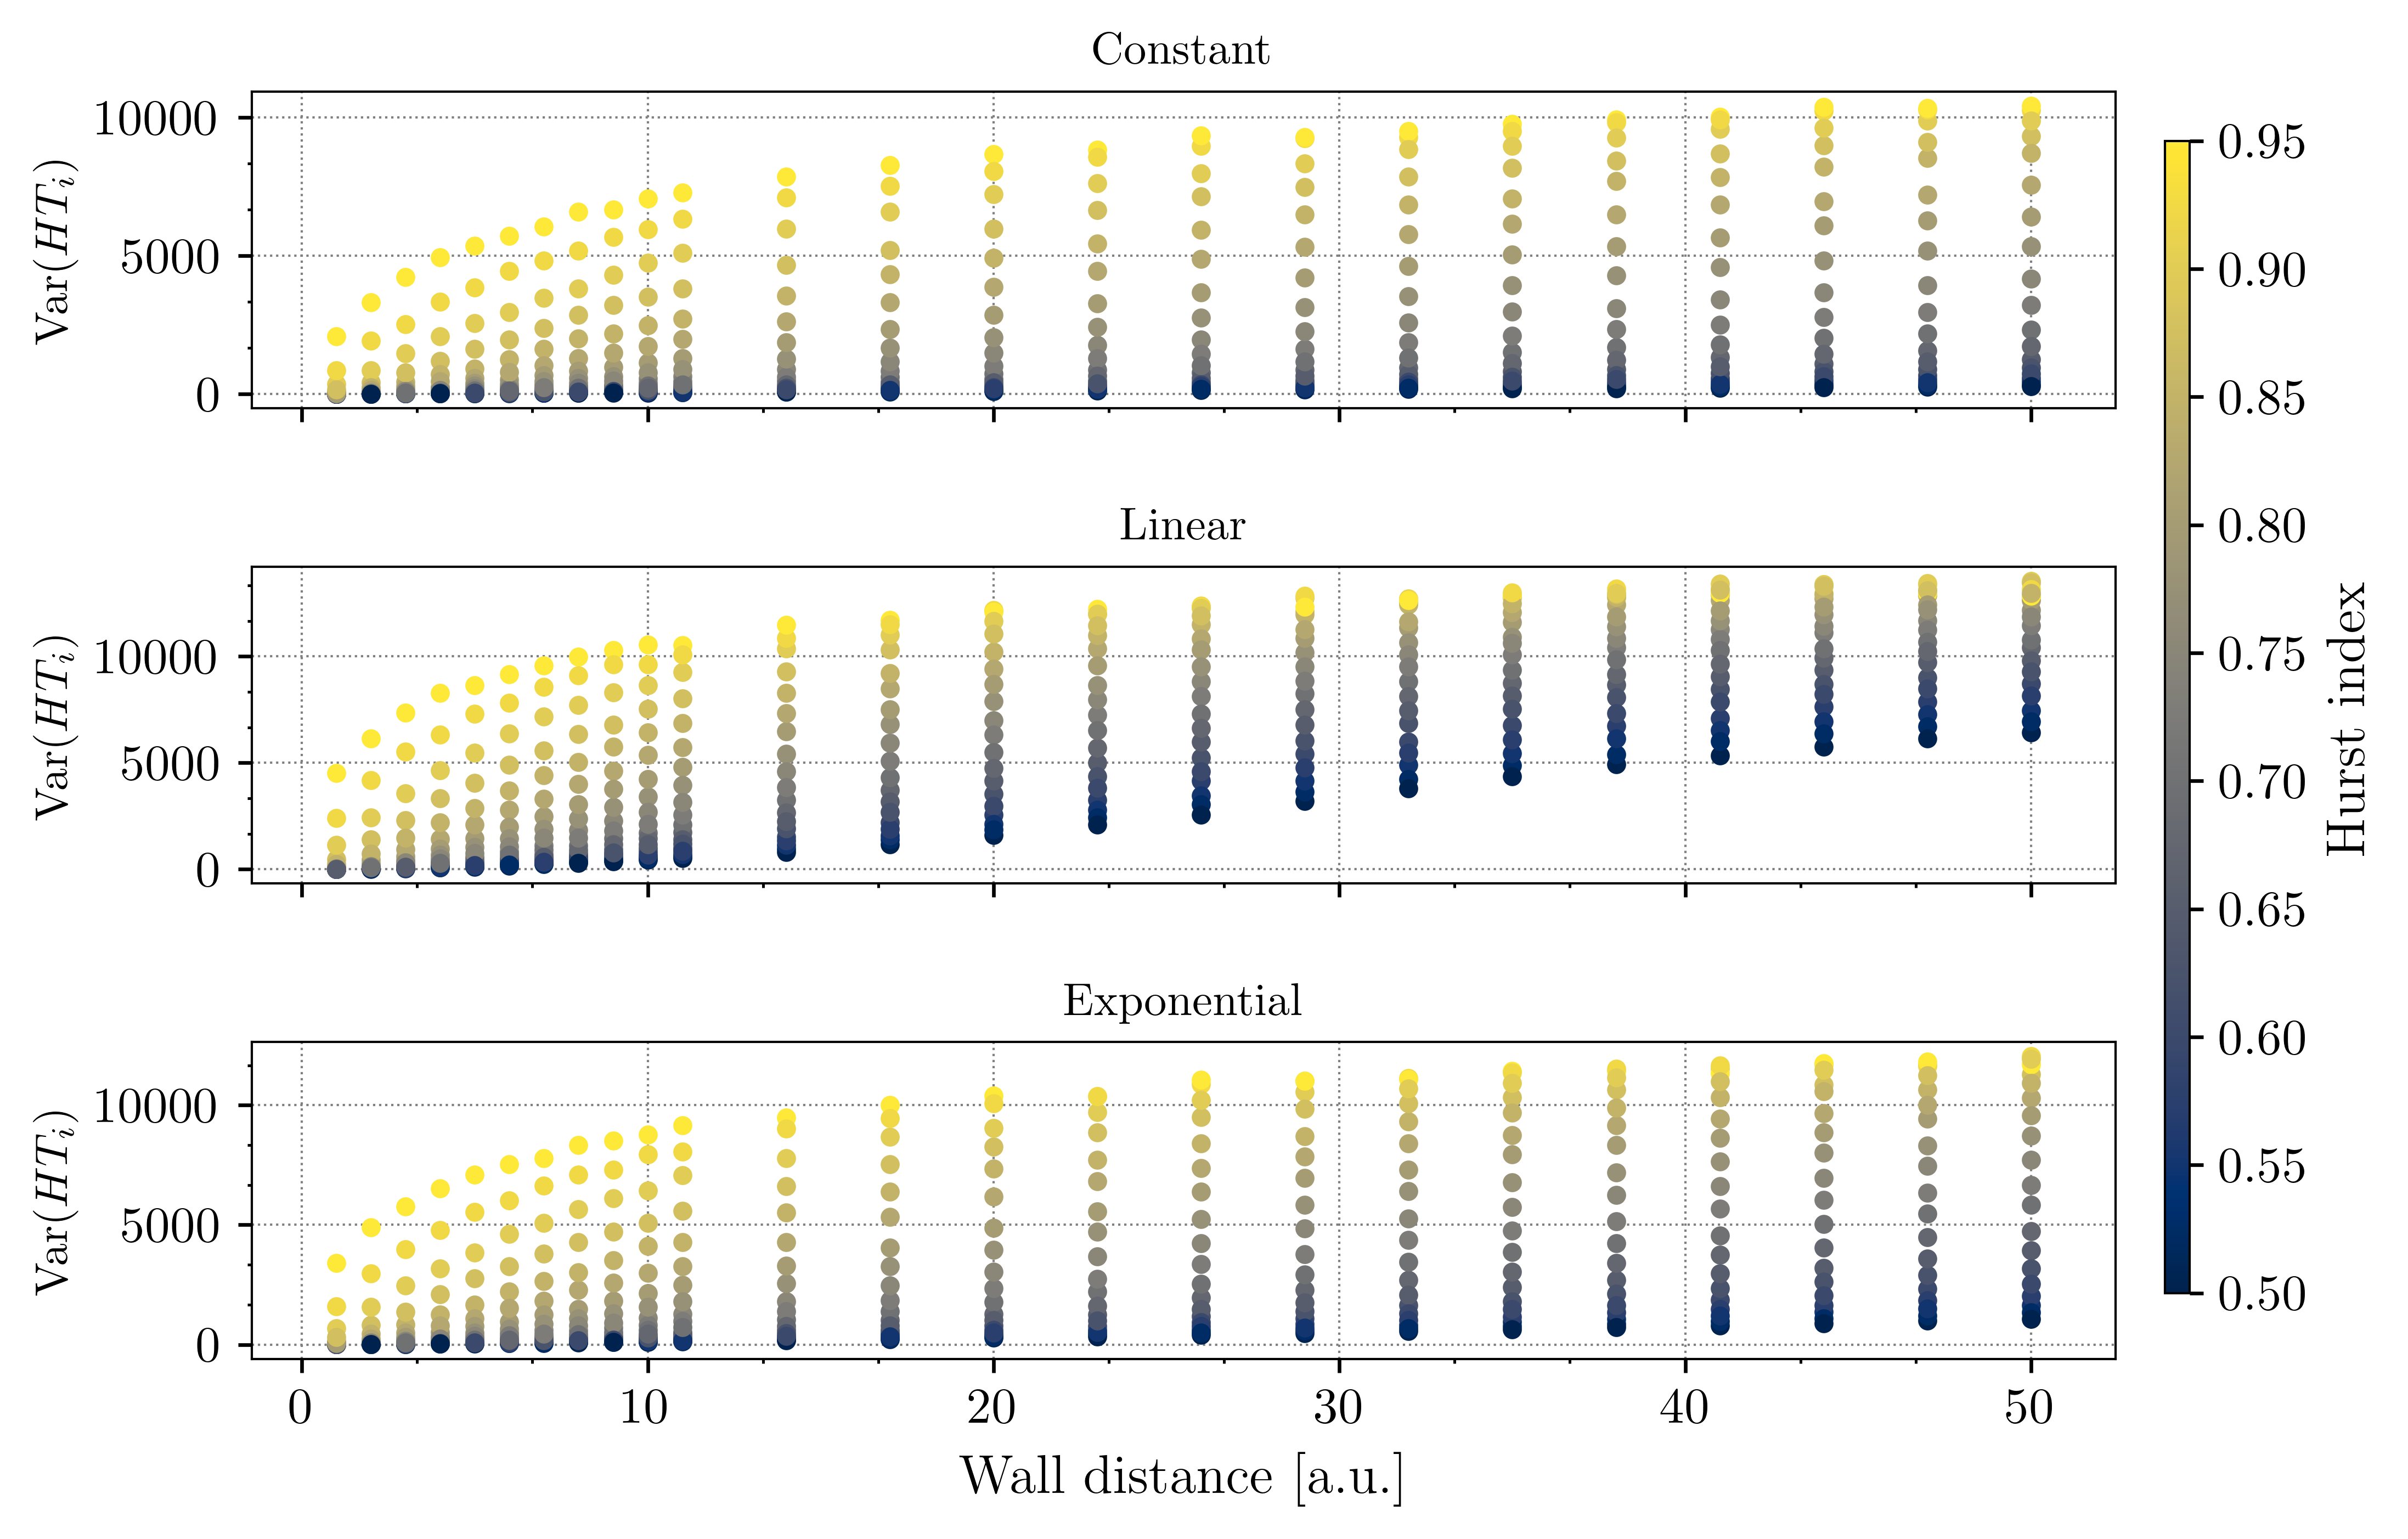

In [44]:
### Moments plot first moment

import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker

### Constant
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)



# constant
folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)



h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if h not in h_values:
        h_values.append(h)




norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499.999]
        # Calculate first moment
        first_momnt = np.var(dist)
        # plot the fist moment
        ax['Constant'].scatter(wall, first_momnt, 
                                    color = cmap(norm(h)),
                                    s = 10, alpha = 1,
                                    zorder = 3
                                )
                                    

# linear
folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = np.var(dist)
        # plot the fist moment
        ax['Linear'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )
        
# exponential
folder = 'exponential_h_wall_cluster'
list_files = os.listdir(folder)

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if  wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = np.var(dist)
        # plot the fist moment
        ax['Exponential'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3
                                )

# # X-axis 

ax['Exponential'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# Y-axis
ax['Constant'].set_ylabel(r'$\mathrm{Var}(HT_i)$', fontsize = 10)
ax['Linear'].set_ylabel(r'$\mathrm{Var}(HT_i)$', fontsize = 10)
ax['Exponential'].set_ylabel(r'$\mathrm{Var}(HT_i)$', fontsize = 10)

# titles
ax['Constant'].set_title(r'Constant', fontsize = 10)
ax['Linear'].set_title(r'Linear', fontsize = 10)
ax['Exponential'].set_title(r'Exponential', fontsize = 10)

### colorbar

fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_jsdiv.pdf'), dpi=600, bbox_inches='tight')


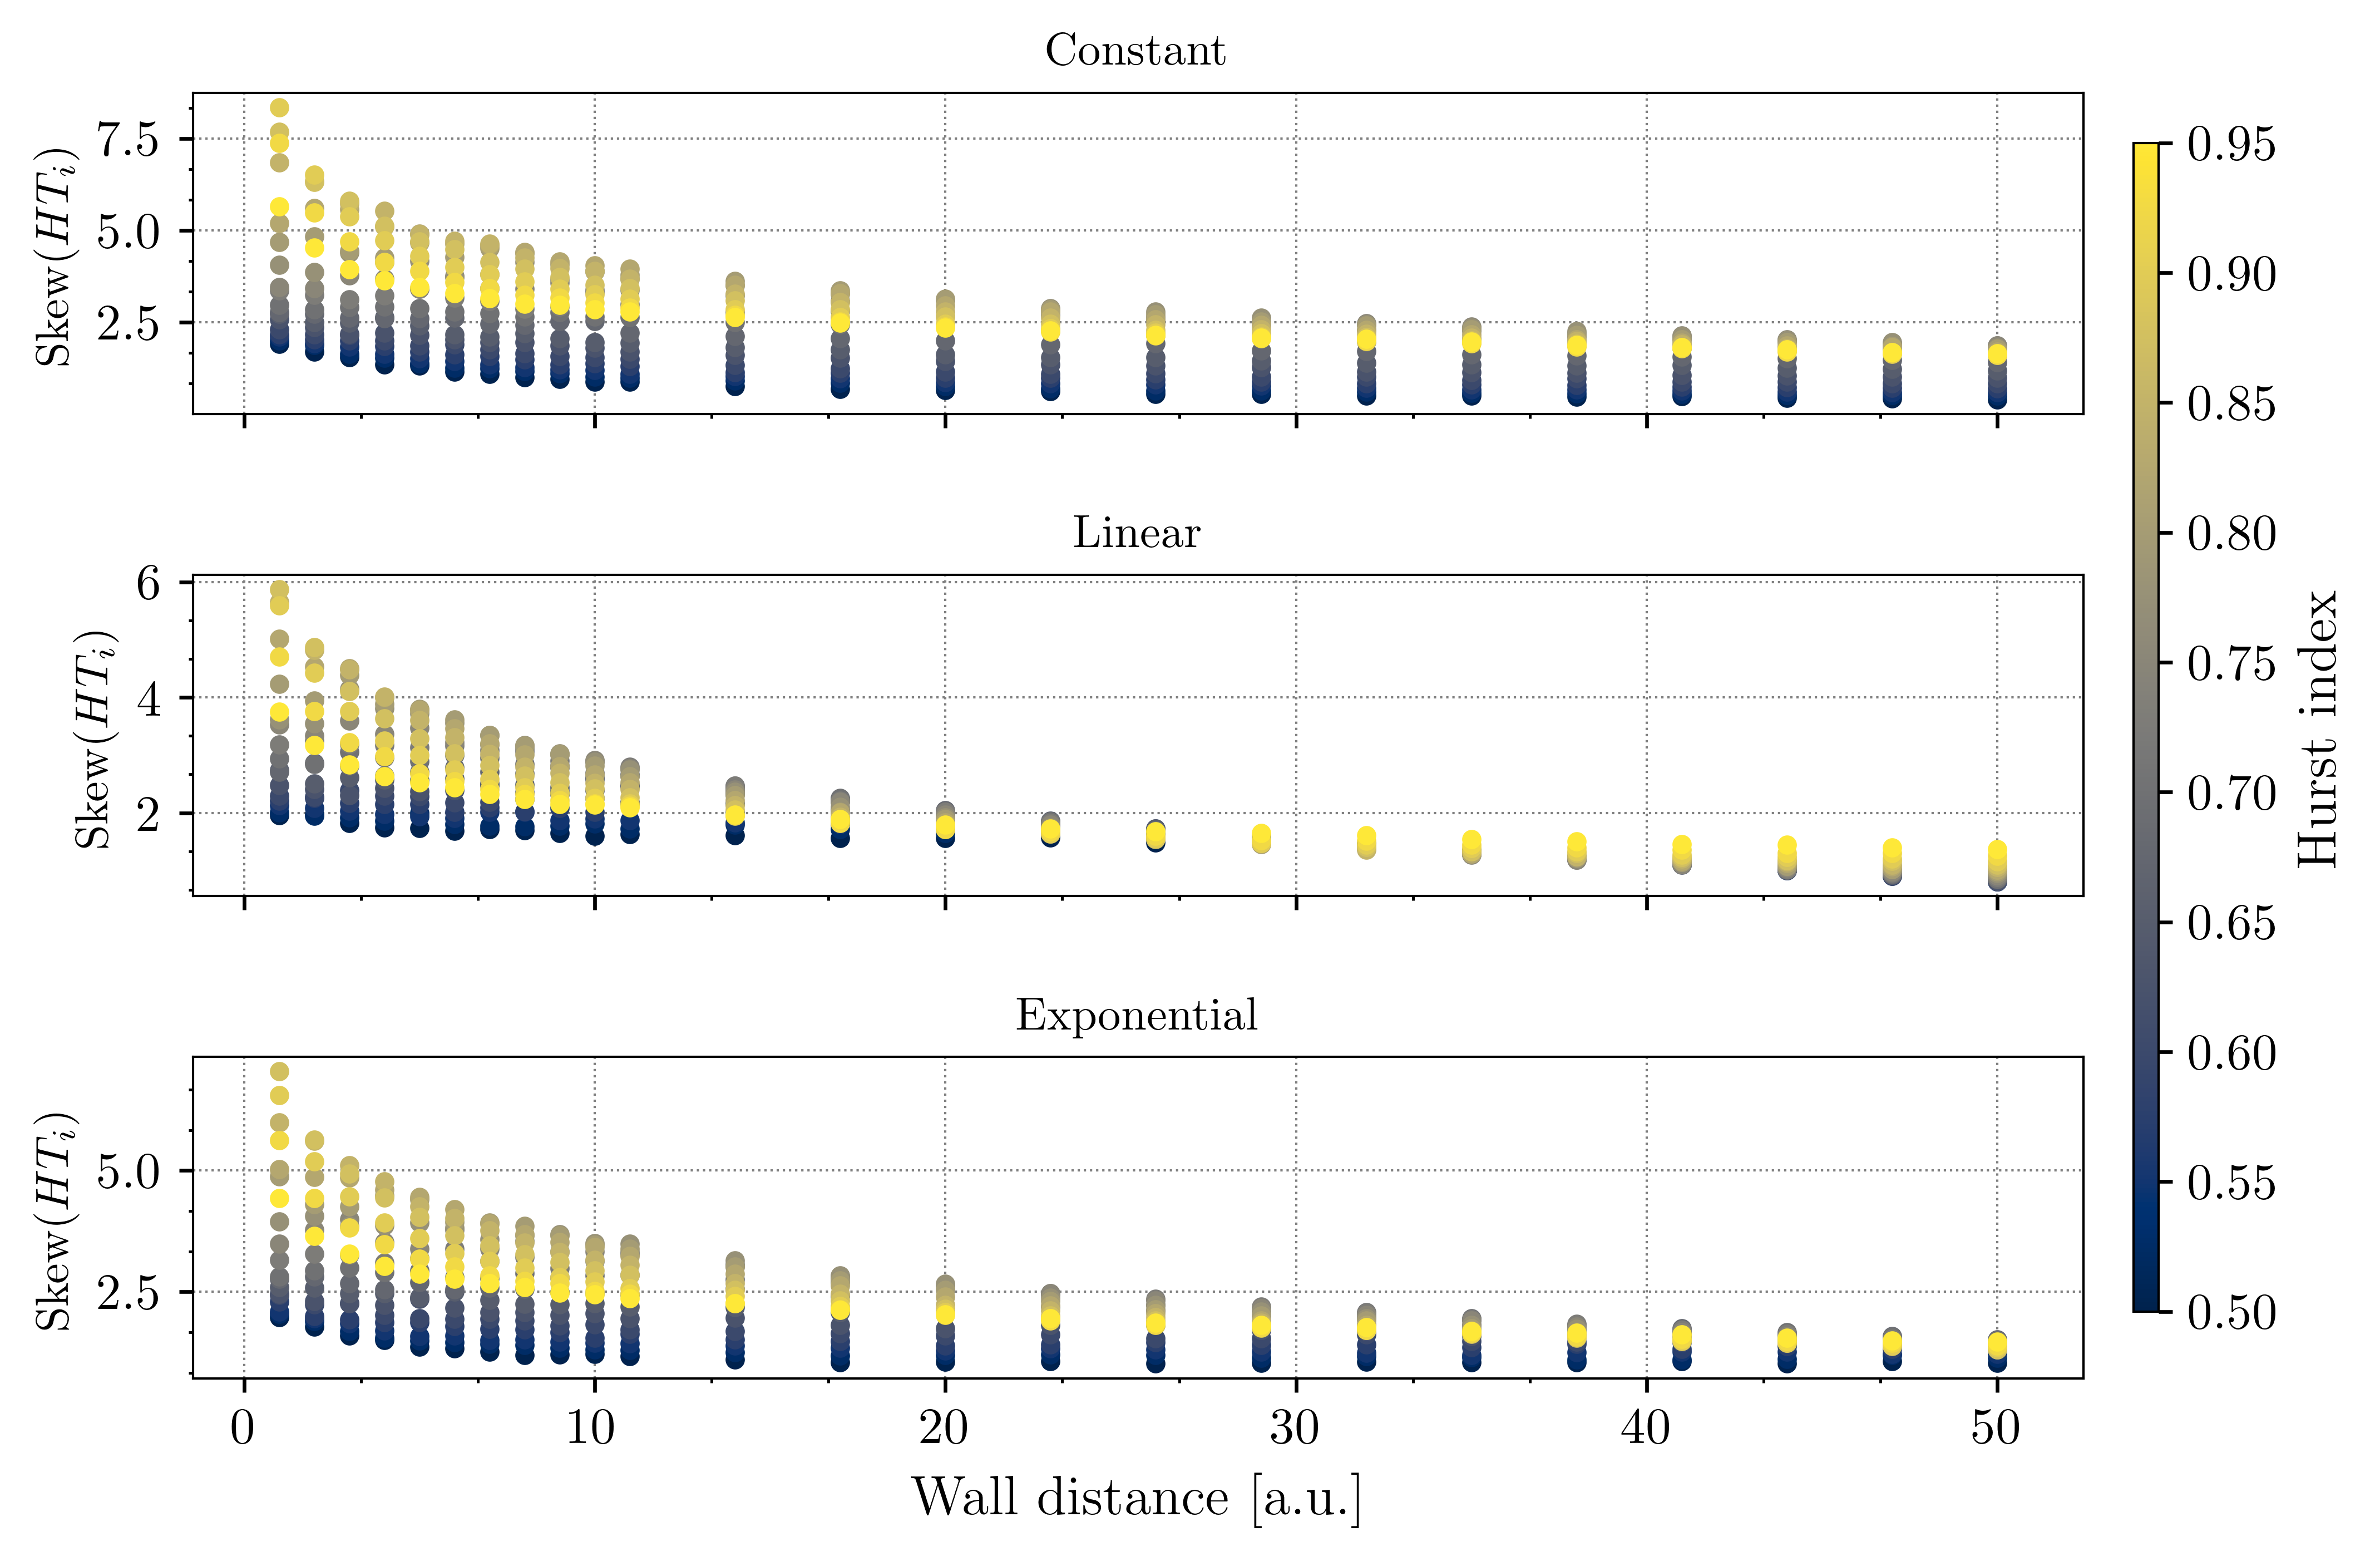

In [45]:


### Constant
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)



# constant
folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)



h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if h not in h_values:
        h_values.append(h)




norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499.999]
        # Calculate first moment
        first_momnt = skew(dist)
        # plot the fist moment
        ax['Constant'].scatter(wall, first_momnt, 
                                    color = cmap(norm(h)),
                                    s = 10, alpha = 1,
                                    zorder = 3 + 10 * h
                                )
                                    

# linear
folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = skew(dist)
        # plot the fist moment
        ax['Linear'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3 + 10 * h
                                )
        
# exponential
folder = 'exponential_h_wall_cluster'
list_files = os.listdir(folder)

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if  wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = skew(dist)
        # plot the fist moment
        ax['Exponential'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3 + 10 * h
                                )

# # X-axis 

ax['Exponential'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# Y-axis
ax['Constant'].set_ylabel(r'$\mathrm{Skew}(HT_i)$', fontsize = 10)
ax['Linear'].set_ylabel(r'$\mathrm{Skew}(HT_i)$', fontsize = 10)
ax['Exponential'].set_ylabel(r'$\mathrm{Skew}(HT_i)$', fontsize = 10)

# titles
ax['Constant'].set_title(r'Constant', fontsize = 10)
ax['Linear'].set_title(r'Linear', fontsize = 10)
ax['Exponential'].set_title(r'Exponential', fontsize = 10)

### colorbar

fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_jsdiv.pdf'), dpi=600, bbox_inches='tight')


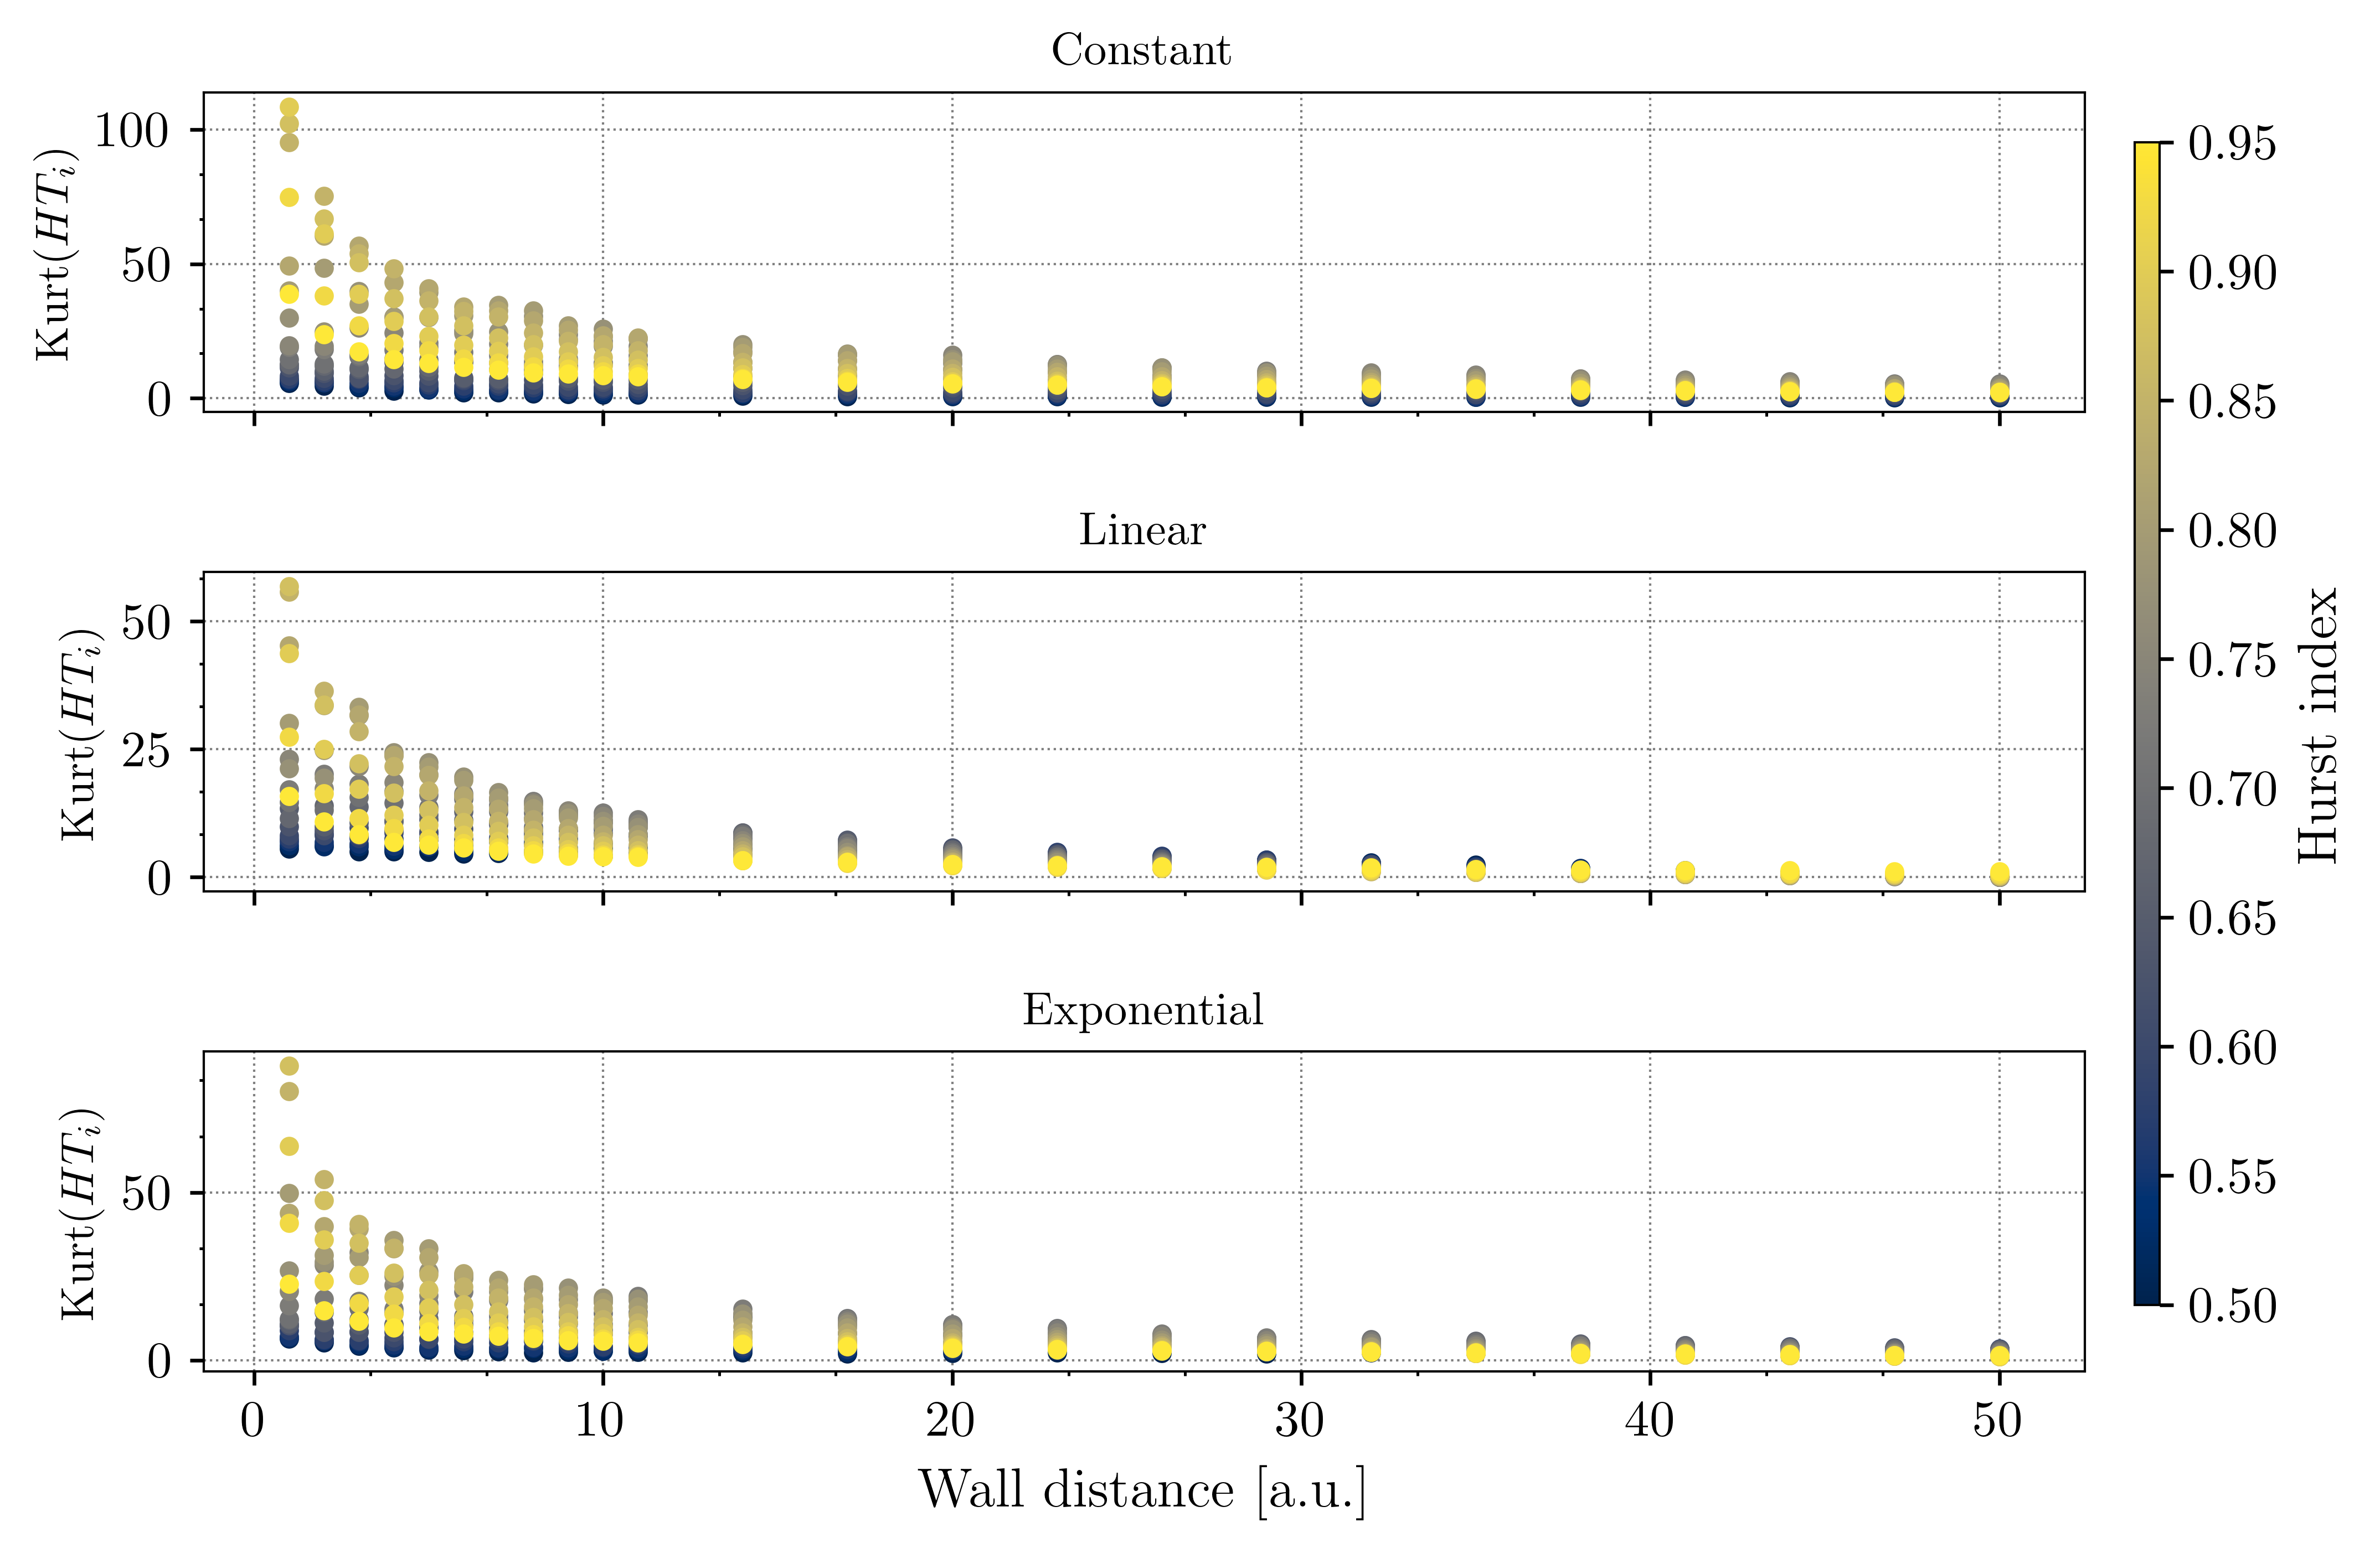

In [46]:


### Constant
### JS divergence plot between the distributions
import os
import pandas as pd
import numpy as np
from os.path import join
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib import ticker
from scipy.stats import skew, kurtosis
from scipy.spatial.distance import jensenshannon


#%% Plot contstant gradient
plt.rcParams.update({
    # Font and text
    "font.size": 12,
    "font.family": "serif",
    # "font.sans-serif": ["DejaVu Sans"],
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "legend.fontsize": 11,
    "xtick.labelsize": 11,

    "ytick.labelsize": 11,
    "text.usetex":True,
    # Axes and grid
    "axes.edgecolor": "black",
    "axes.linewidth": 0.5,
    "axes.grid": False,
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    "grid.linewidth": 0.6,

    # Ticks
    "xtick.direction": "out",
    "ytick.direction": "out",
    "xtick.major.size": 3,
    "ytick.major.size": 3,
    "xtick.minor.size": 1,
    "ytick.minor.size": 1,
    # Figure
    # "figure.figsize": (10, 6),
    # "figure.dpi": 100,
    # Lines
    "lines.linewidth": 2,
    "lines.markersize": 6,
    # Savefig
    "savefig.dpi": 600,
    "savefig.transparent": True,
})



def js_divergence(p, q):
    return jensenshannon(p, q)**2


fig, ax = plt.subplot_mosaic(
    [['Constant'],
     ['Linear'],
     ['Exponential']],
    figsize=(7.5, 5), dpi=600,
    sharex=True,
    # sharey=True,
    gridspec_kw={"hspace": 0.5},
)



# constant
folder = 'constant_h_wall_cluster'
list_files = os.listdir(folder)



h_values = []
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall = int(float(archiv2[1].split('_')[1]))
    if h not in h_values:
        h_values.append(h)




norm = mcolors.Normalize(vmin=min(h_values), vmax= max(h_values))
cmap = plt.cm.cividis

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499.999]
        # Calculate first moment
        first_momnt = kurtosis(dist)
        # plot the fist moment
        ax['Constant'].scatter(wall, first_momnt, 
                                    color = cmap(norm(h)),
                                    s = 10, alpha = 1,
                                    zorder = 3 + 10 * h
                                )
                                    

# linear
folder = 'linear_h_wall_cluster'
list_files = os.listdir(folder)
for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy() # h != 0.5
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = kurtosis(dist)
        # plot the fist moment
        ax['Linear'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3 + 10 * h
                                )
        
# exponential
folder = 'exponential_h_wall_cluster'
list_files = os.listdir(folder)

for archiv in list_files:
    archiv2 = archiv.strip('.csv.csv')
    archiv2 = archiv2.split('__')
    h = float(archiv2[0].split('_')[1])
    wall =  int(float(archiv2[1].split('_')[1]))
    if  wall >= 1:
        dist = pd.read_csv(join(folder, archiv)).to_numpy()
        dist = dist[dist<499]
        # calculate the first moment
        first_momnt = kurtosis(dist)
        # plot the fist moment
        ax['Exponential'].scatter(wall, first_momnt, 
                                 color = cmap(norm(h)),
                                 s = 10, alpha = 1,
                                 zorder = 3 + 10 * h
                                )

# # X-axis 

ax['Exponential'].set_xlabel('Wall distance [a.u.]', fontsize = 12)

# Y-axis
ax['Constant'].set_ylabel(r'$\mathrm{Kurt}(HT_i)$', fontsize = 10)
ax['Linear'].set_ylabel(r'$\mathrm{Kurt}(HT_i)$', fontsize = 10)
ax['Exponential'].set_ylabel(r'$\mathrm{Kurt}(HT_i)$', fontsize = 10)

# titles
ax['Constant'].set_title(r'Constant', fontsize = 10)
ax['Linear'].set_title(r'Linear', fontsize = 10)
ax['Exponential'].set_title(r'Exponential', fontsize = 10)

### colorbar

fig.subplots_adjust(right=0.88)  # Leave space for colorbar
cbar_ax = fig.add_axes([0.90, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label("Hurst index")

# ticks
for a in ax.values():
    a.xaxis.set_minor_locator(ticker.AutoMinorLocator(3))  # 3 minor ticks per major
    a.yaxis.set_minor_locator(ticker.AutoMinorLocator(3))
    a.grid(which='major', color='gray', linestyle=':', linewidth=0.5, zorder = 0)
    
# fig.savefig(join('figures', 'hitting_time_distribution_jsdiv.pdf'), dpi=600, bbox_inches='tight')
